In [1]:
#pip install tensorflow

# Importing required libraries:

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

# The dataset:

In [193]:
diabetes_data=pd.read_csv("Diabetes_dataset.csv") #loading the dataset

# Data Pre-processing:

In [194]:
diabetes_data.head() #printing first five rows

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1,0
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0


In [195]:
diabetes_data.shape #checking the shape of the dataframe

(70692, 18)

In [196]:
diabetes_data['Diabetes'].value_counts()

0    35346
1    35346
Name: Diabetes, dtype: int64

In [197]:
diabetes_data.describe() #descriptive statistic summary

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
diabetes_data.isna().sum() #Checking the missing values

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [199]:
diabetes_data.isnull().sum() #checking the null values

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [200]:
diabetes_data.info() #getting the datatypes info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   70692 non-null  int64
 1   Sex                   70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   HeartDiseaseorAttack  70692 non-null  int64
 7   PhysActivity          70692 non-null  int64
 8   Fruits                70692 non-null  int64
 9   Veggies               70692 non-null  int64
 10  HvyAlcoholConsump     70692 non-null  int64
 11  GenHlth               70692 non-null  int64
 12  MentHlth              70692 non-null  int64
 13  PhysHlth              70692 non-null  int64
 14  DiffWalk              70692 non-null  int64
 15  Stroke                70692 non-null  int64
 16  High

In [201]:
diabetes_data.duplicated().sum() #finding the duplicated values

6672

In [202]:
if diabetes_data.duplicated().sum() == 0:
        print('No Duplicated Values')
else:
    print('Duplicated data has been eliminated')
    diabetes_data.drop_duplicates()   #eliminating the duplicated values

Duplicated data has been eliminated


# EDA & Data visualization:

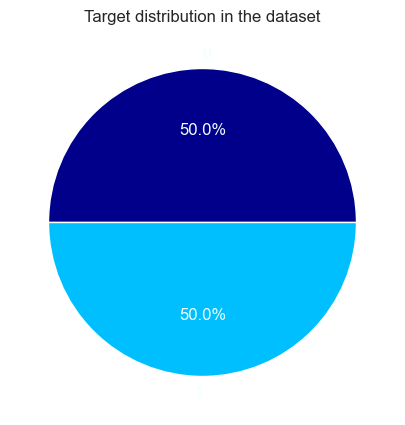

In [203]:
# Create a pie chart
counts = diabetes_data['Diabetes'].value_counts()
plt.figure(figsize=[7,5])
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',textprops=dict(color="azure"),colors=['darkblue', 'deepskyblue'])
plt.title('Target distribution in the dataset')
plt.show()


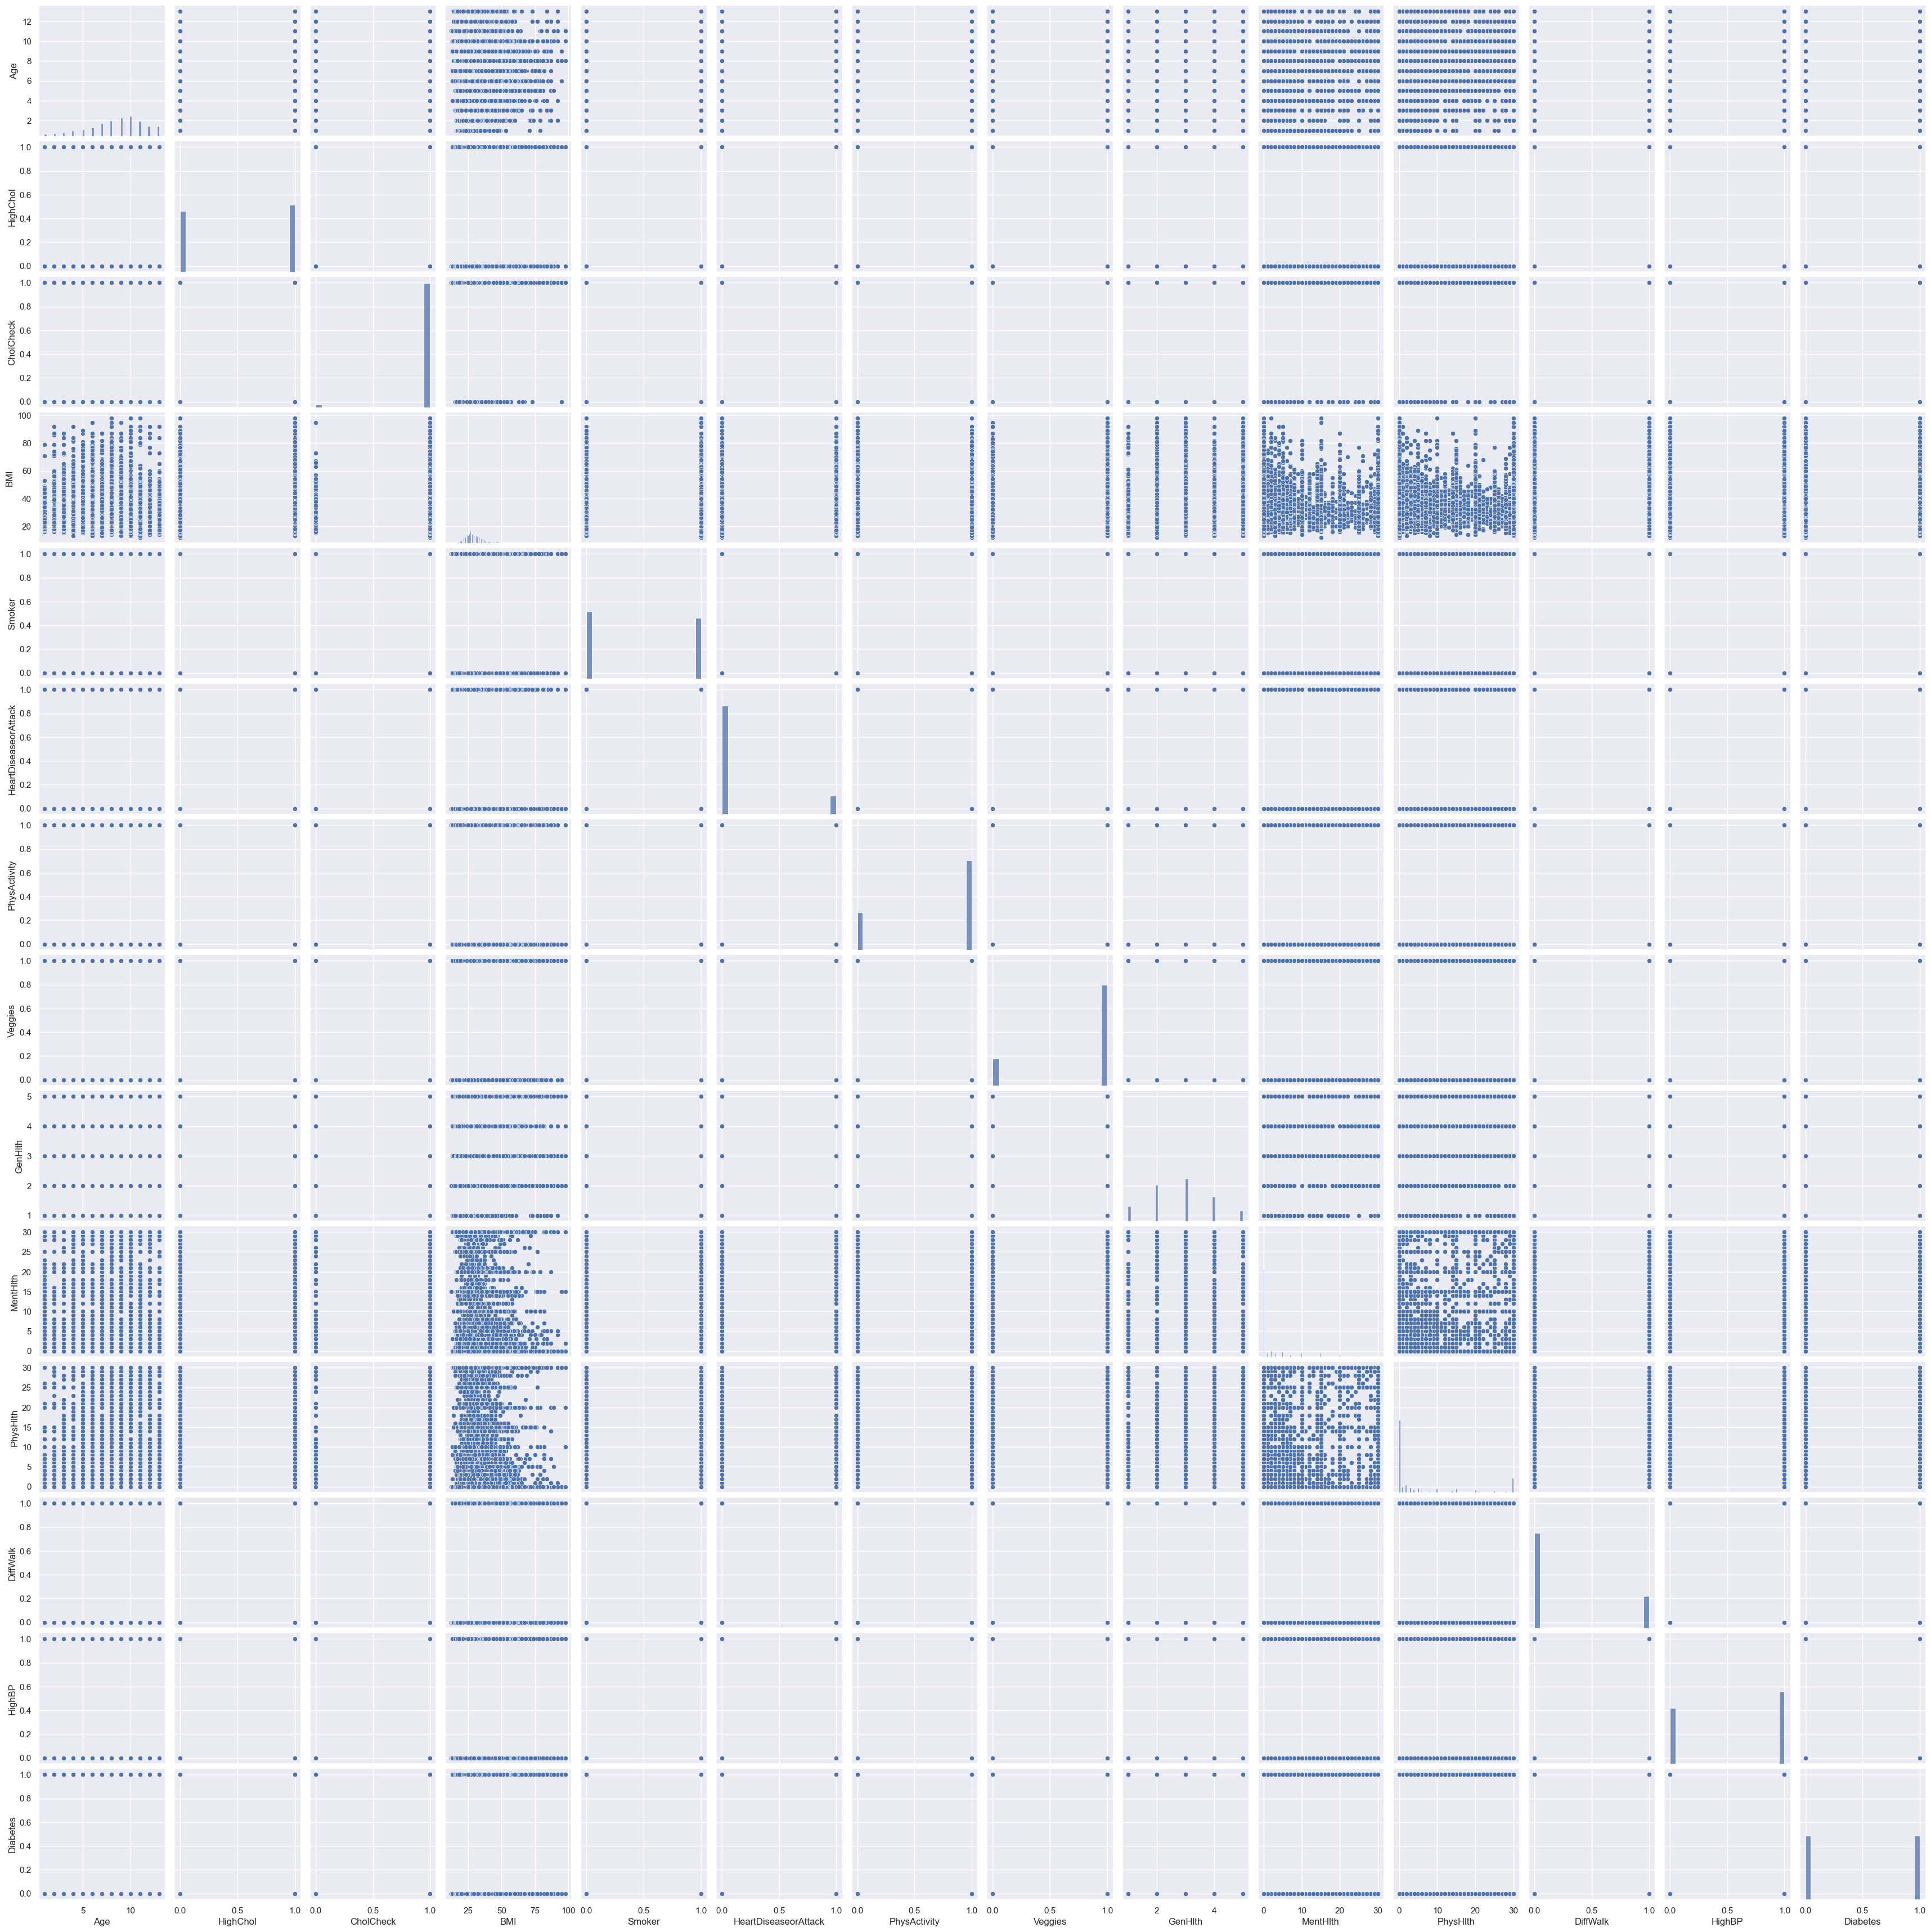

In [340]:
#Pairplot to find correlation btn all features:
sns.pairplot(diabetes_data)
plt.show()

In [13]:
#selecting variables that are likely to predict diabetes medically:
#dia_data = diabetes_data[["Age","Sex","HighChol","BMI","Smoker","PhysActivity","PhysHlth","Fruits","Veggies","HvyAlcoholConsump","GenHlth","Stroke","HighBP","Diabetes"]]
#dia_data.head()

In [204]:
#Checking unique value count:
unique_values = {}
for col in diabetes_data.columns:
    unique_values[col] = diabetes_data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


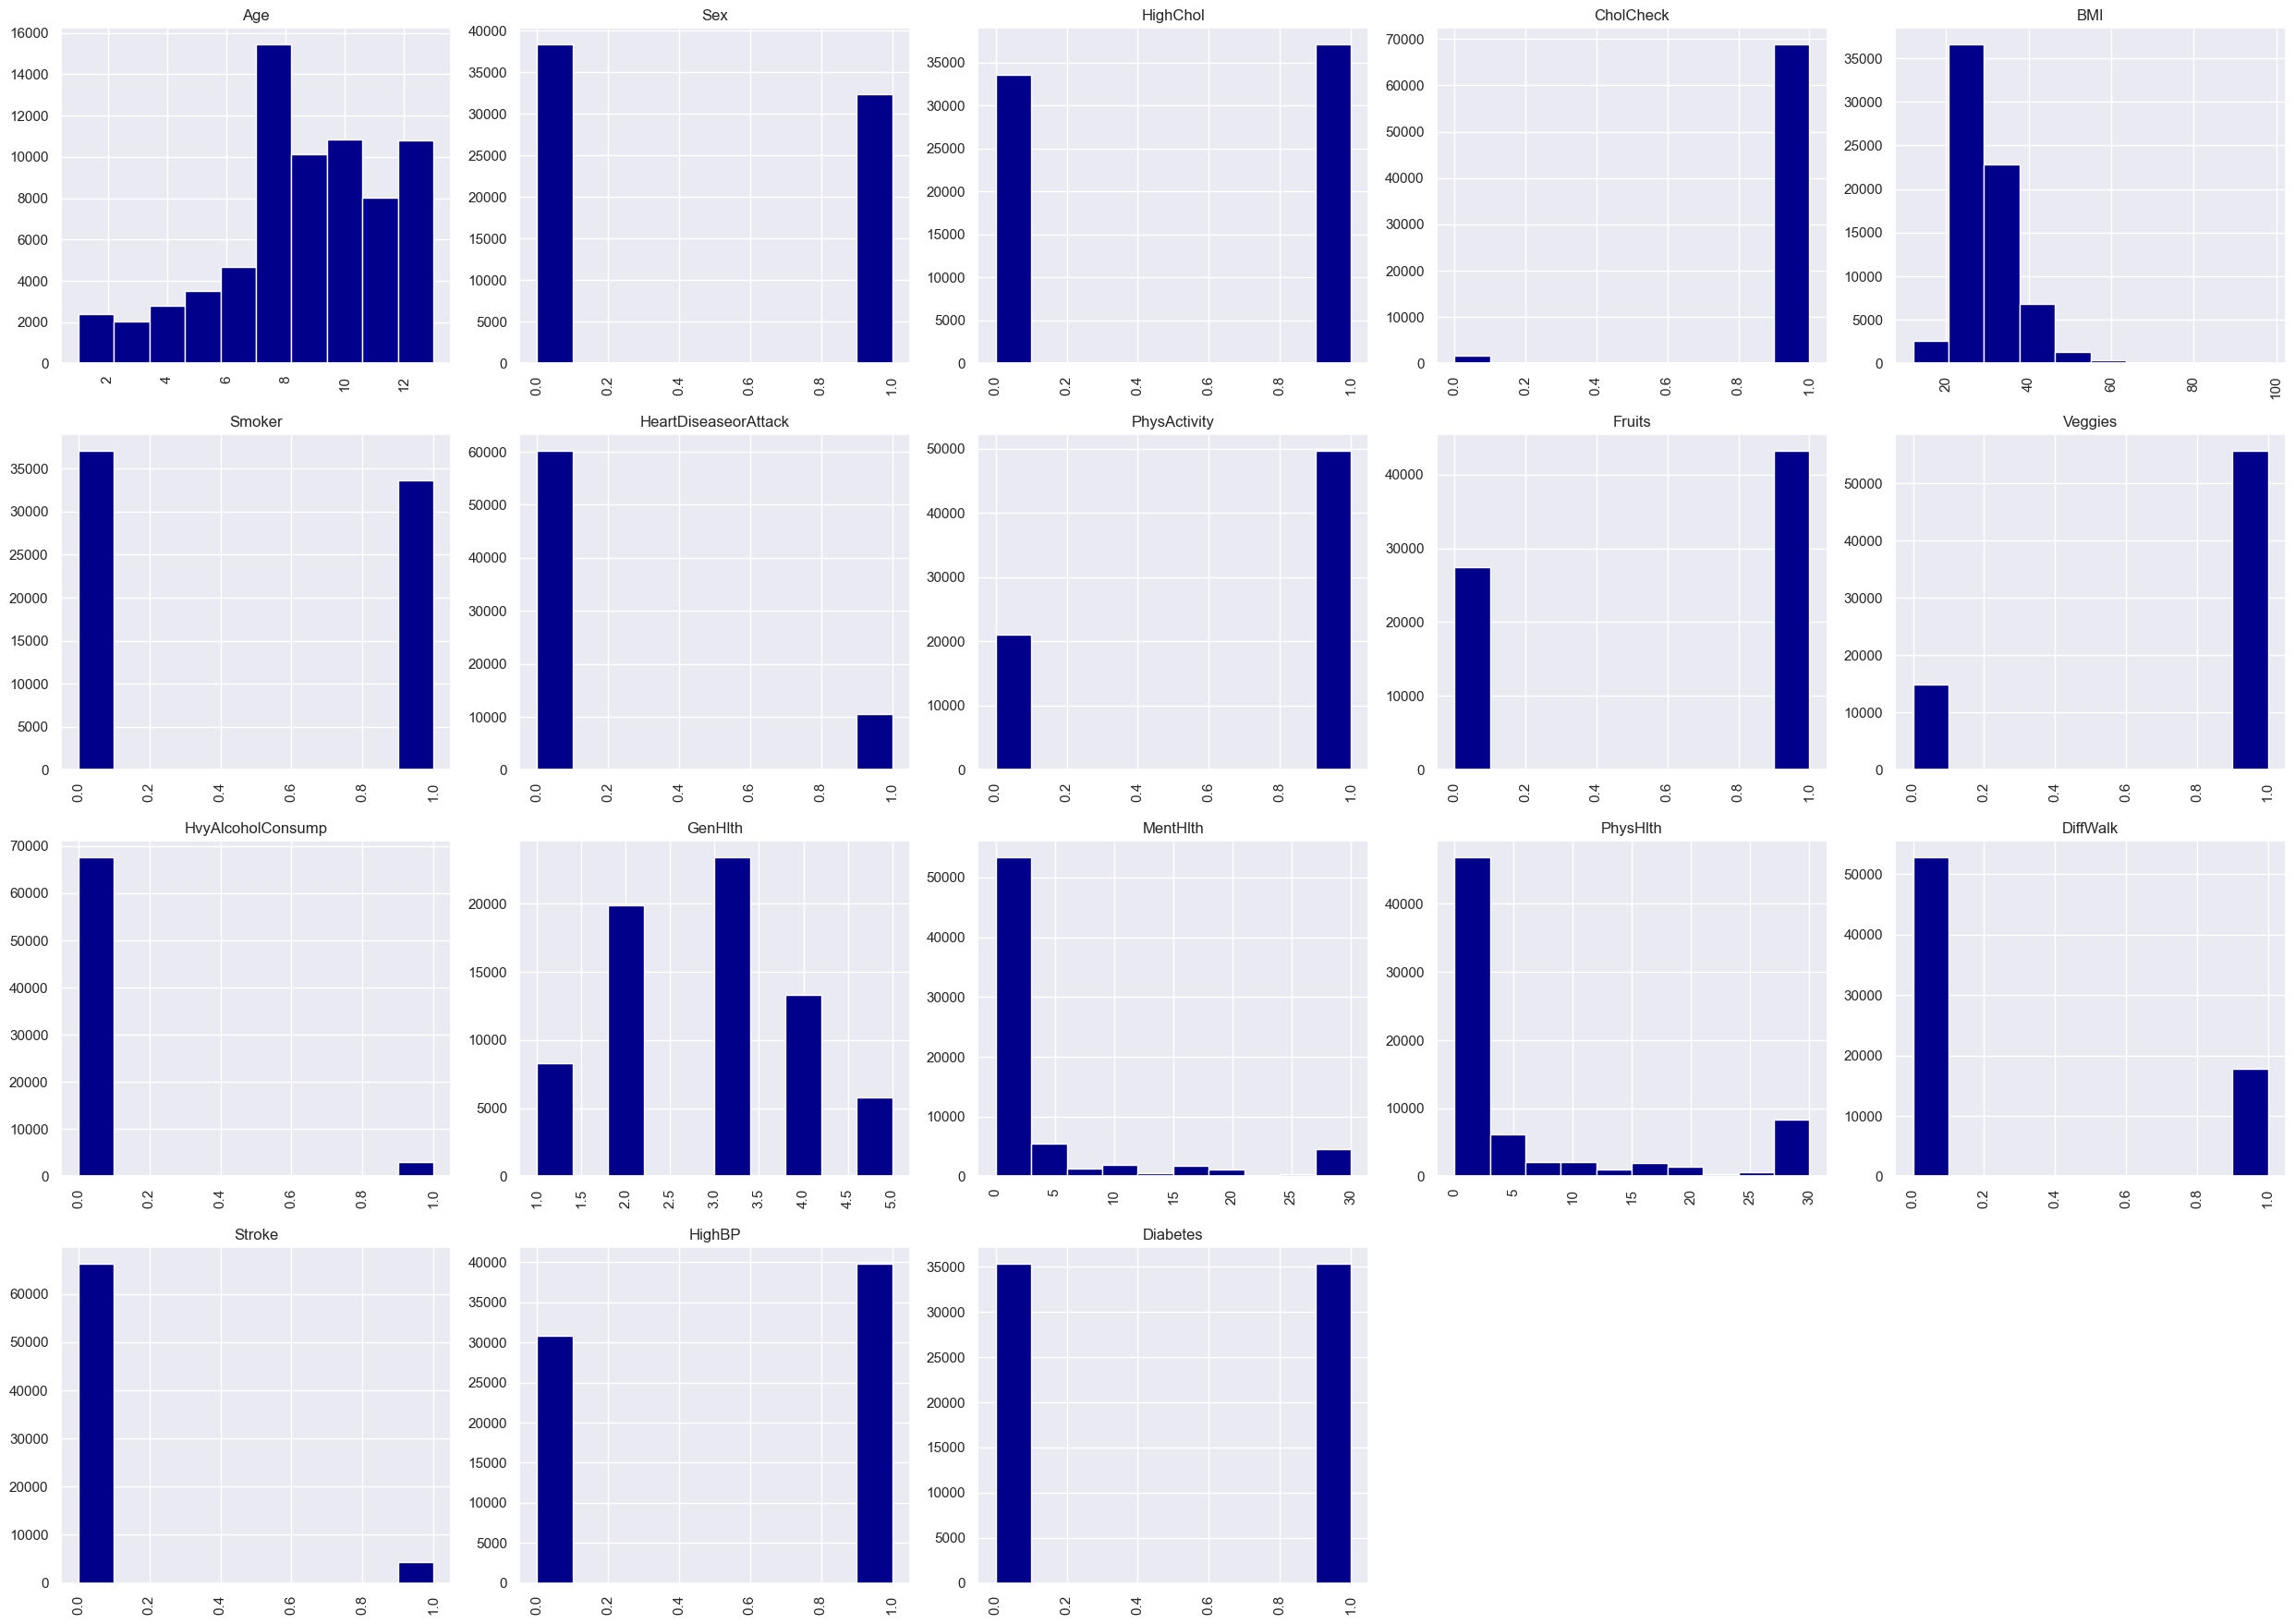

In [205]:
#frequency check for all values in the column:

# All data columns except for color
feature_cols = [x for x in diabetes_data.columns]
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(diabetes_data[feature_cols[i]],color = "darkblue")
    
plt.tight_layout()

Now, dropping columns with very small value range:'HvyAlcoholConsump' and 'stroke'

In [206]:
diabetes_data.drop(['HvyAlcoholConsump','Stroke'], axis=1, inplace=True)

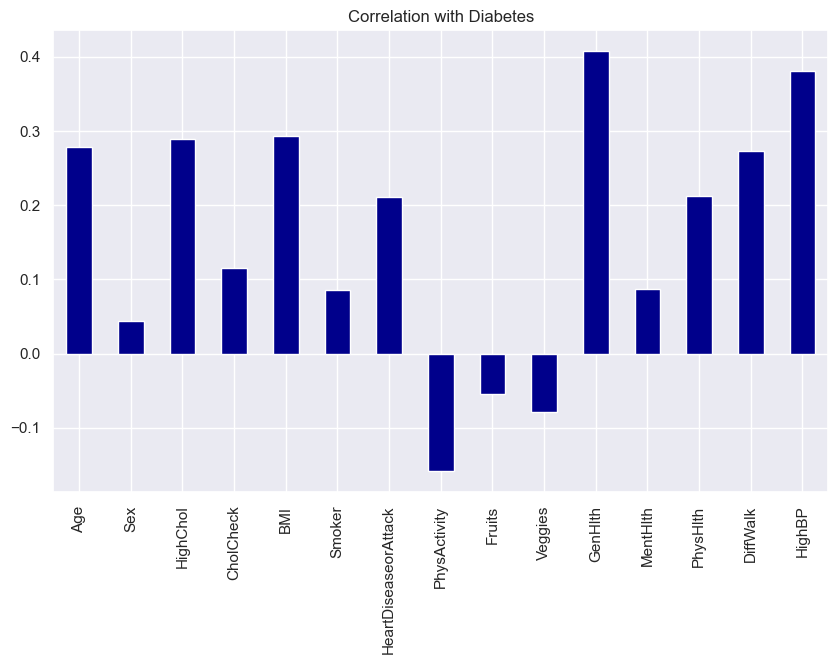

In [207]:
#Correlation of other features with Diabetes:
diabetes_data.drop('Diabetes', axis=1).corrwith(diabetes_data.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="darkblue");

Findings:variables with correlation less than 0.1 are Sex, Smoker, Fruits, Veggies

# Correlation matrix:

<AxesSubplot:>

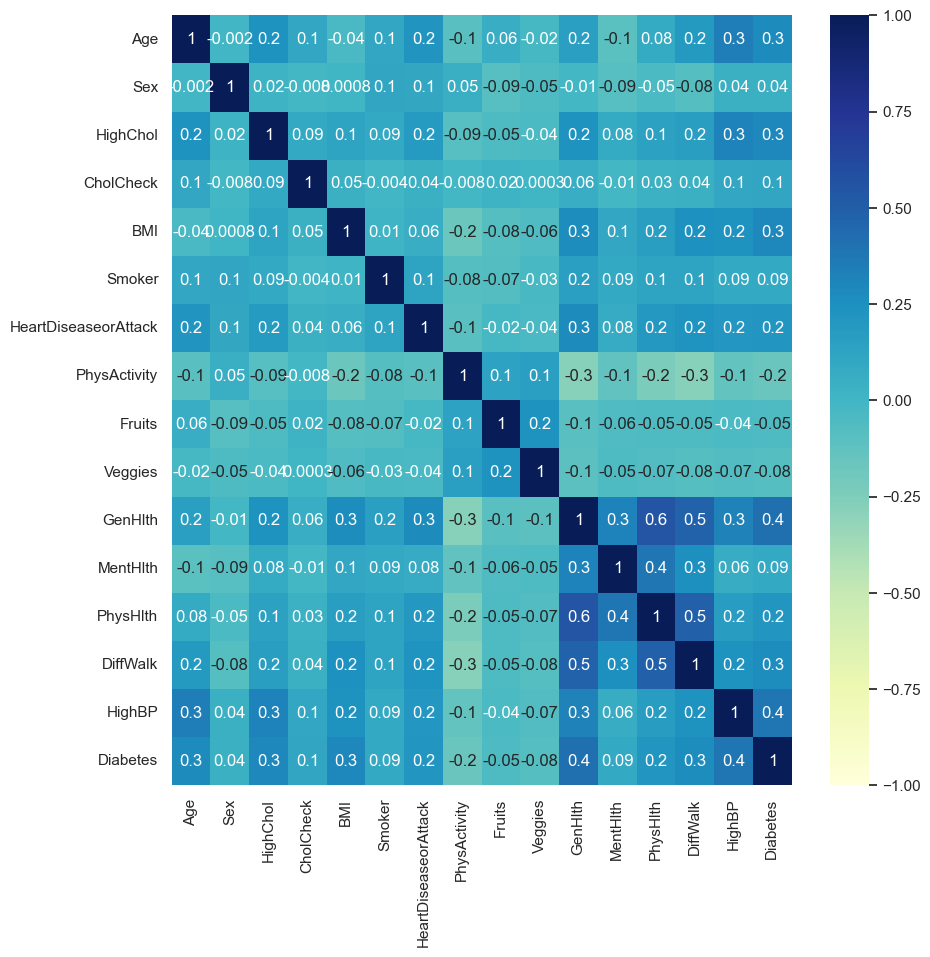

In [208]:
# check for all possible co-variates:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(diabetes_data.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'YlGnBu')

In [209]:
#dropping the variables with low correlations: 
diabetes_data.drop(['Sex','Fruits'], axis=1, inplace=True)

In [210]:
diabetes_data.head()

,Age,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4,0,1,26,0,0,1,1,3,5,30,0,1,0
1,12,1,1,26,1,0,0,0,3,0,0,0,1,0
2,13,0,1,26,0,0,1,1,1,0,10,0,0,0
3,11,1,1,28,1,0,1,1,3,0,3,0,1,0
4,8,0,1,29,1,0,1,1,2,0,0,0,0,0


#narrowed down to 13 possible determinants 
#determine which predictors are more useful

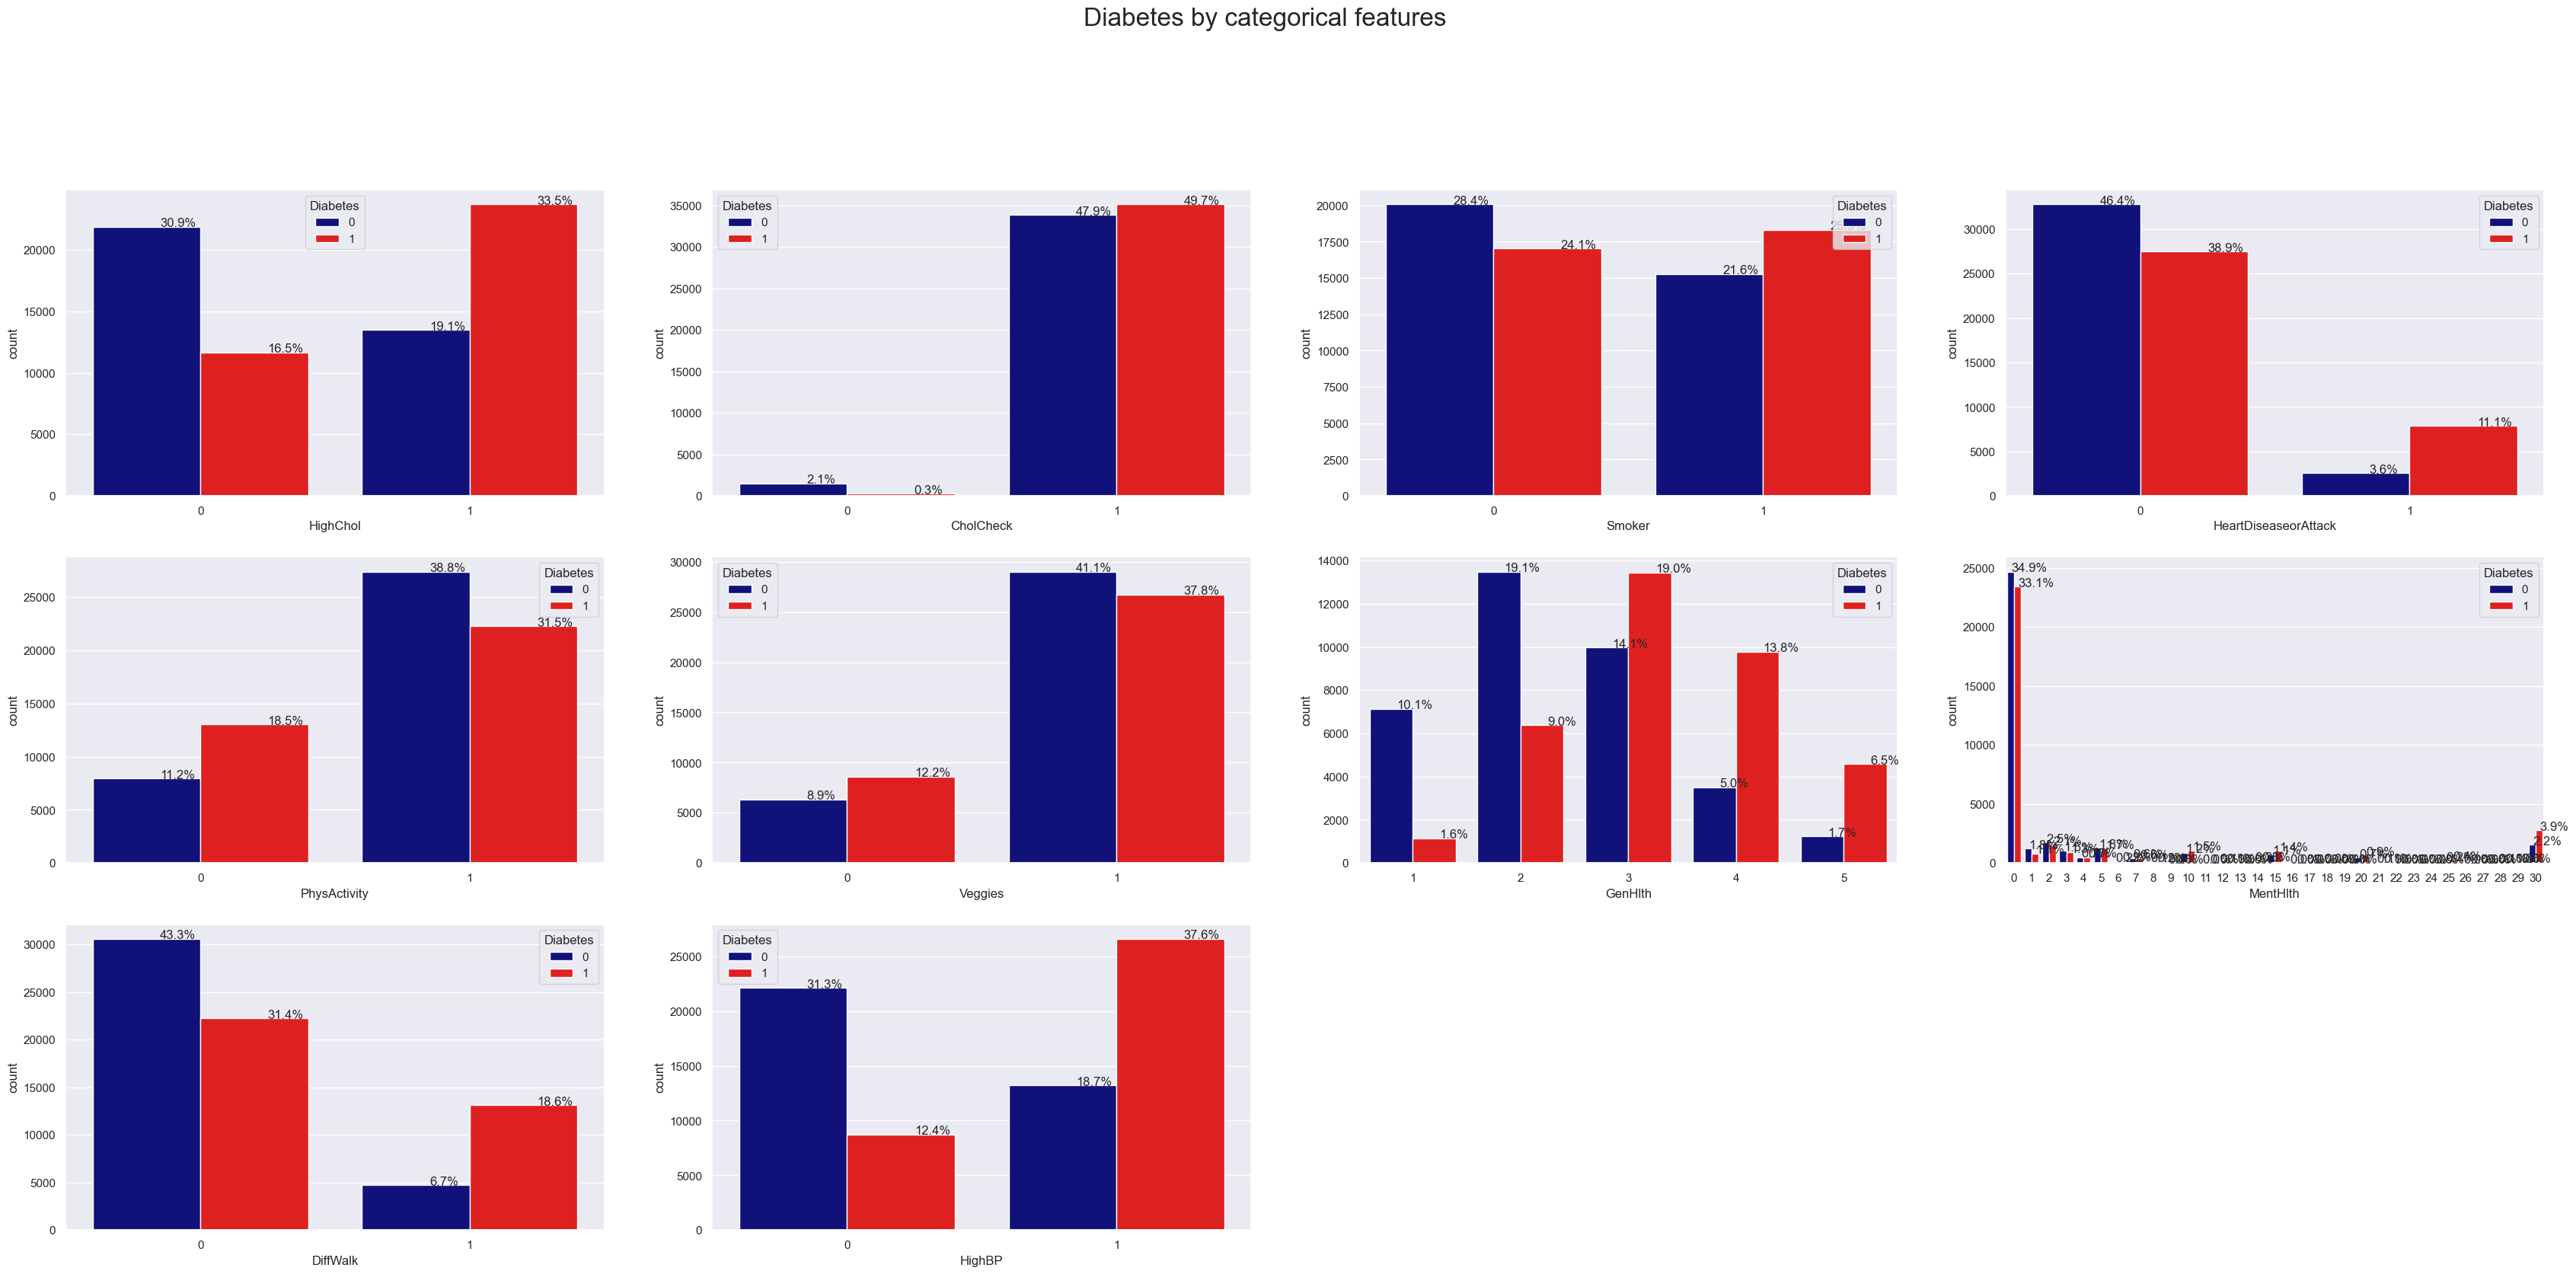

In [211]:
# Bivariate bar plot for categorical variables
features = [x for x in diabetes_data.columns if x not in ['Age', 'BMI', 'PhysHlth', 'Diabetes']]
plt.figure(figsize=(42, 24))  
plt.suptitle('Diabetes by categorical features',fontsize=24)

# Subplots
for i in enumerate(features):
    plt.subplot(4, 4, i[0] + 1)
    x = sns.countplot(
        data=diabetes_data,
        x=i[1],
        hue='Diabetes',
        palette=['darkblue', 'red']
    )
    for z in x.patches:
        x.annotate(
            '{:.1f}'.format((z.get_height() / diabetes_data.shape[0]) * 100) + '%',
            (z.get_x() + 0.25, z.get_height() + 0.01)
        )


<Figure size 1000x500 with 0 Axes>

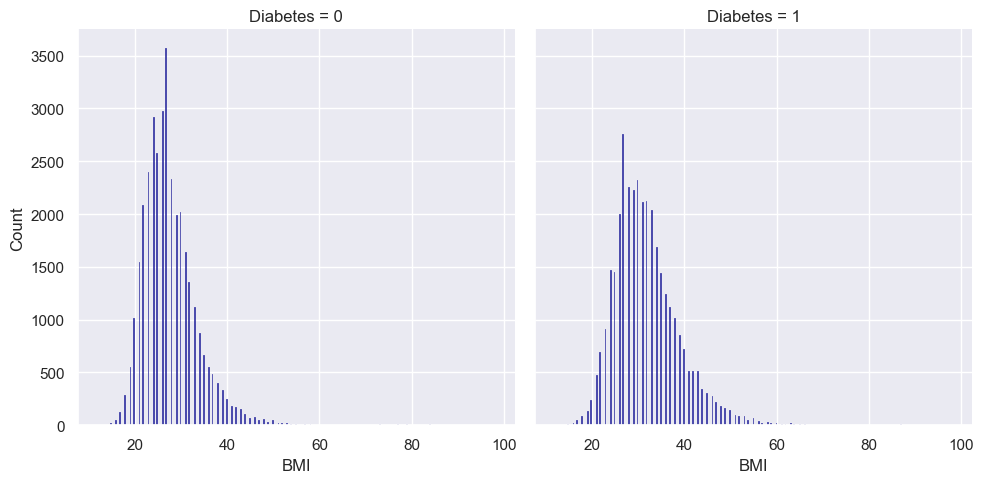

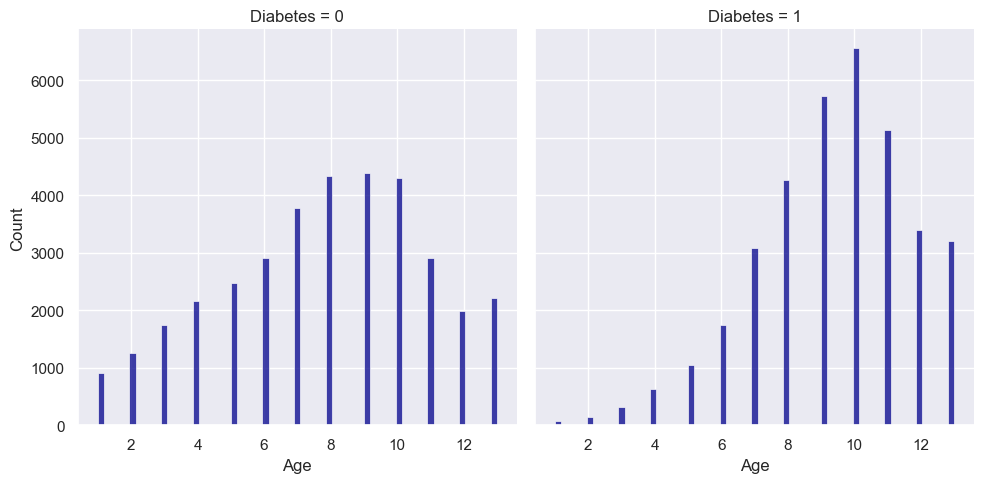

In [212]:
#for numeric variables
plt.figure(figsize=(10,5))
sns.displot(x='BMI', col='Diabetes' , data = diabetes_data, color = 'darkblue')
sns.displot(data=diabetes_data,col='Diabetes',x='Age', color='darkblue')

# Feature selection:

In [213]:
#Features selection -step 1
#1. Define X,y
Y = (diabetes_data['Diabetes']).astype(int)
X = diabetes_data.loc[:, diabetes_data.columns != 'Diabetes']  # everything except "Diabetes"

[0.14863888 0.05025212 0.00790552 0.26742608 0.01775776 0.02139678
 0.01625257 0.01519451 0.11886773 0.08647227 0.1057715  0.03710852
 0.10695575]


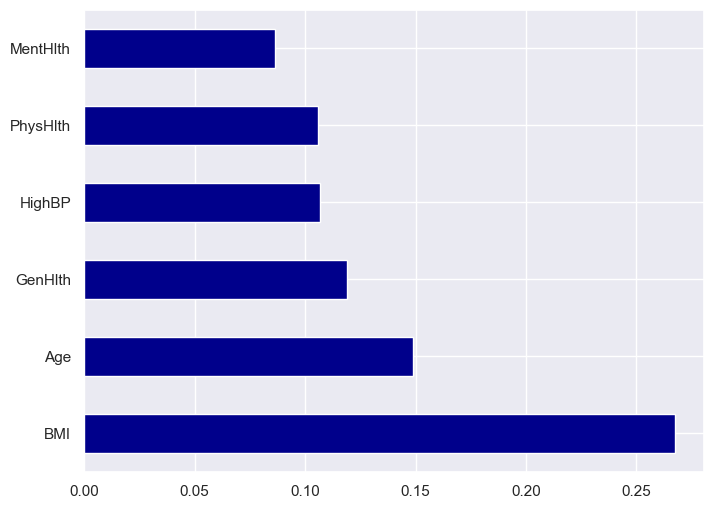

In [214]:
#step 2
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(6).plot(kind='barh',color='darkblue')
plt.show()

In [215]:
diabetes_data.head()

,Age,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4,0,1,26,0,0,1,1,3,5,30,0,1,0
1,12,1,1,26,1,0,0,0,3,0,0,0,1,0
2,13,0,1,26,0,0,1,1,1,0,10,0,0,0
3,11,1,1,28,1,0,1,1,3,0,3,0,1,0
4,8,0,1,29,1,0,1,1,2,0,0,0,0,0


In [341]:
diabetes_data.tail()

,Age,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,HighBP,Diabetes
70687,6,1,1,37,0,0,0,1,4,0,0,0,0,1
70688,10,1,1,29,1,1,0,1,2,0,0,1,0,1
70689,13,1,1,25,0,1,0,0,5,15,0,1,1,1
70690,11,1,1,18,0,0,0,0,4,0,0,1,1,1
70691,9,1,1,25,0,1,1,0,2,0,0,0,1,1


# Splitting data into train data & test data:

In [277]:
Y = (diabetes_data['Diabetes']).astype(int)
X = diabetes_data.loc[:, diabetes_data.columns != 'stroke']  # everything except "stroke"

In [278]:
S= StandardScaler() 

In [279]:
S.fit(X) #standardising the features

StandardScaler()

In [280]:
Stdz_data=S.transform(X) #transforming the features

In [281]:
print(Stdz_data)

[[-1.60723742 -1.05279808  0.15927581 ... -0.58155367  0.88020109
  -1.        ]
 [ 1.19768093  0.94984976  0.15927581 ... -0.58155367  0.88020109
  -1.        ]
 [ 1.54829572 -1.05279808  0.15927581 ... -0.58155367 -1.13610402
  -1.        ]
 ...
 [ 1.54829572  0.94984976  0.15927581 ...  1.71953175  0.88020109
   1.        ]
 [ 0.84706614  0.94984976  0.15927581 ...  1.71953175  0.88020109
   1.        ]
 [ 0.14583655  0.94984976  0.15927581 ... -0.58155367  0.88020109
   1.        ]]


In [282]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [283]:
pca.fit(Stdz_data)

PCA(n_components=10)

In [284]:
x_pca=pca.transform(Stdz_data)

In [285]:
Stdz_data.shape

(70692, 14)

In [286]:
x_pca.shape

(70692, 10)

In [287]:
Stdz_data

array([[-1.60723742, -1.05279808,  0.15927581, ..., -0.58155367,
         0.88020109, -1.        ],
       [ 1.19768093,  0.94984976,  0.15927581, ..., -0.58155367,
         0.88020109, -1.        ],
       [ 1.54829572, -1.05279808,  0.15927581, ..., -0.58155367,
        -1.13610402, -1.        ],
       ...,
       [ 1.54829572,  0.94984976,  0.15927581, ...,  1.71953175,
         0.88020109,  1.        ],
       [ 0.84706614,  0.94984976,  0.15927581, ...,  1.71953175,
         0.88020109,  1.        ],
       [ 0.14583655,  0.94984976,  0.15927581, ..., -0.58155367,
         0.88020109,  1.        ]])

In [288]:
x_pca

array([[-0.48419872,  1.70135547,  0.11961652, ...,  0.04292295,
        -0.67243946,  0.34177712],
       [ 0.45674308, -1.02226786, -0.34843845, ..., -1.23175608,
         0.51616771,  0.15774581],
       [-2.03359333, -0.40898043, -0.58548074, ..., -0.34825718,
        -0.72831382, -0.12188895],
       ...,
       [ 3.57125266, -0.5417408 , -0.42525705, ...,  0.42425807,
         0.92330686,  0.86888731],
       [ 1.75035676, -0.82788513,  0.38245898, ..., -1.36821379,
        -0.2552438 , -0.34645767],
       [ 0.39772361, -1.9413617 ,  0.05668974, ...,  1.69040618,
         0.8192693 ,  0.39917932]])

In [289]:
X= x_pca

In [290]:
Y= diabetes_data['Diabetes'] 

In [291]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.4)
#, stratify=Y,random_state=42

In [292]:
print(X.shape,X_train.shape,X_test.shape)

(70692, 10) (42415, 10) (28277, 10)


In [270]:
print(X)

[[-0.48419872  1.70135547  0.11961652 ...  0.04292295 -0.67243946
   0.34177712]
 [ 0.45674308 -1.02226786 -0.34843845 ... -1.23175608  0.51616771
   0.15774581]
 [-2.03359333 -0.40898043 -0.58548074 ... -0.34825718 -0.72831382
  -0.12188895]
 ...
 [ 3.57125266 -0.5417408  -0.42525705 ...  0.42425807  0.92330686
   0.86888731]
 [ 1.75035676 -0.82788513  0.38245898 ... -1.36821379 -0.2552438
  -0.34645767]
 [ 0.39772361 -1.9413617   0.05668974 ...  1.69040618  0.8192693
   0.39917932]]


In [271]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
70687    1
70688    1
70689    1
70690    1
70691    1
Name: Diabetes, Length: 70692, dtype: int64


In [272]:
print(type(Y))

<class 'pandas.core.series.Series'>


In [274]:
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

# Model building and testing:


# KNN:

In [46]:
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [47]:
pred_knn = knn.predict(X_test)
pred_knn

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_modelX1(Y_test):
    #fit the model instance 
    predictions = pred_knn # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [49]:
print(classification_report(Y_test,pred_knn ))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14131
           1       0.88      0.86      0.87     14146

    accuracy                           0.87     28277
   macro avg       0.87      0.87      0.87     28277
weighted avg       0.87      0.87      0.87     28277



In [50]:
# Calculate the accuracy score for the default KNN model
accuracy_knn = accuracy_score(Y_test, pred_knn)
print("Accuracy score for default KNN model:", accuracy_knn)

Accuracy score for default KNN model: 0.8695406160483785


In [51]:
R1 = train_evaluate_modelX1(Y_test)
R1.index = ['K Nearest Neighbors - Method 1']
R1.style.background_gradient(cmap = sns.color_palette("blend:darkblue,deepskyblue", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.869541,0.868433,0.876341,0.860667,0.869545,0.869545


# Hyperparameter tuning for K Nearest Neighbors


In [52]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.848 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.843 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.857 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.852 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.849 total time=   0.0s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.848 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.843 total time=   0.2s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.857 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.852 total time=   0.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.849 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.852 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

In [53]:
print(gridKNN.best_params_)

{'n_neighbors': 11, 'weights': 'uniform'}


# KNN with best parameters:

In [54]:
knn2 = KNeighborsClassifier(n_neighbors = 19, weights= 'distance')
knn2.fit(X_train, Y_train)
pred_knn2 = knn2.predict(X_test)
print(classification_report(Y_test, pred_knn2))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14131
           1       0.88      0.86      0.87     14146

    accuracy                           0.87     28277
   macro avg       0.87      0.87      0.87     28277
weighted avg       0.87      0.87      0.87     28277



# Confusion matrix:

<Figure size 500x500 with 0 Axes>

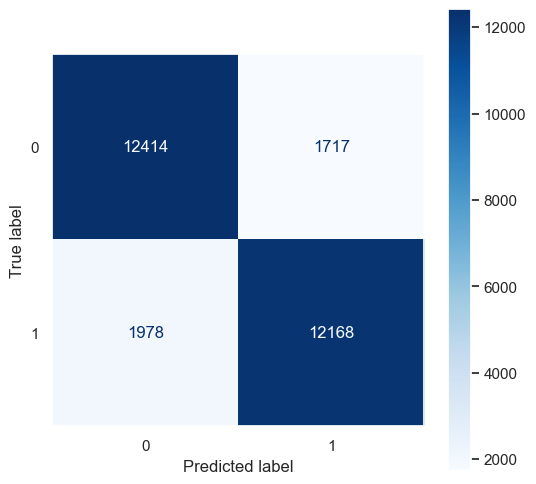

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Trim the shorter array
Y_test = Y_test[:len(pred_knn2)]

# Compute the confusion matrix
cm = confusion_matrix(Y_test, pred_knn2)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues)

# Remove the cell gridlines
plt.grid(which='major')

# Set the figure size
plt.gcf().set_size_inches(6, 6)

# Show the plot
plt.show()


# Accuracy score for KNN with the best parameters:

In [56]:
accuracy_knn2 = accuracy_score(Y_test, pred_knn2)
print("Accuracy score for KNN model with best parameters:", accuracy_knn2)

Accuracy score for KNN model with best parameters: 0.8693284294656435


# Cross-validation using scikit

In [57]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    knn2 = KNeighborsClassifier(n_neighbors = 19, weights= 'distance')
    knn2.fit(X_train, Y_train)   
    predictions = knn2.predict(X_test)
    print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6939
           1       0.96      0.94      0.95      7200

    accuracy                           0.95     14139
   macro avg       0.95      0.95      0.95     14139
weighted avg       0.95      0.95      0.95     14139

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6902
           1       0.96      0.94      0.95      7237

    accuracy                           0.95     14139
   macro avg       0.95      0.95      0.95     14139
weighted avg       0.95      0.95      0.95     14139

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6906
           1       0.96      0.94      0.95      7232

    accuracy                           0.95     14138
   macro avg       0.95      0.95      0.95     14138
weighted avg       0.95      0.95      0.95     14138

              preci

In [58]:
accuracy_knn3 = accuracy_score(Y_test, predictions)
print("Accuracy score for KNN model with best parameters:", accuracy_knn3)

Accuracy score for KNN model with best parameters: 0.9501343895883435


# 

In [59]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model1(Y_test):
    #fit the model instance 
    #predictions = pred_knn3 # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [60]:
results = train_evaluate_model1(Y_test)
results.index = ['K Nearest Neighbors - Method 1']
results.style.background_gradient(cmap = sns.color_palette("blend:darkblue,deepskyblue", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.950134,0.950243,0.945638,0.954894,0.950147,0.950147


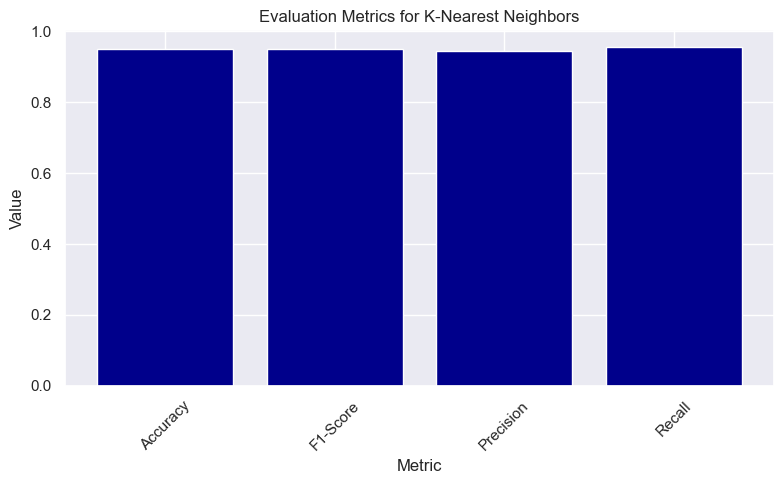

In [61]:
# Calculate and store the metrics
accuracy = accuracy_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Metric'], metrics_df['Value'],color='darkblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for K-Nearest Neighbors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AUC: 0.9501471471110897


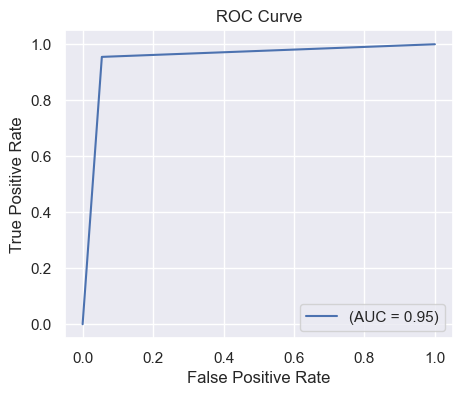


False Positive Rates: [0.         0.05459932 1.        ]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
True Positive Rates: [0.         0.95489362 1.        ]


In [62]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 4))
fpr, tpr, thresholds = roc_curve(Y_test, predictions)

# Calculate the AUC
auc = roc_auc_score(Y_test, predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label='(AUC = %0.2f)' % auc)

# Print the AUC
print('AUC:', auc)

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("")
print('False Positive Rates:', fpr)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print('True Positive Rates:', tpr)

# Random Forest:

In [63]:
RF=RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [64]:
pred_RF = RF.predict(X_test)
pred_RF

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [65]:
print(classification_report(Y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7088
           1       0.95      0.96      0.95      7050

    accuracy                           0.95     14138
   macro avg       0.95      0.95      0.95     14138
weighted avg       0.95      0.95      0.95     14138



In [66]:
# Calculate the accuracy score for the default rf model
accuracy_RF = accuracy_score(Y_test, pred_RF)
print("Accuracy score for default Random Forest model:", accuracy_RF)

Accuracy score for default Random Forest model: 0.9515490168340642


In [67]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model2(Y_test):
    #fit the model instance 
    predictions = pred_RF # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

# Tuning for RF

In [70]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],   
    'criterion' :['gini', 'entropy']
}

gridrf = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 5)
  
# fitting the model for grid search
gridrf.fit(X_train, Y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.938 total time=   1.3s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.938 total time=   1.4s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.938 total time=   1.3s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.940 total time=   1.5s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=10;, score=0.942 total time=   1.3s
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=50;, score=0.944 total time=   6.7s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=50;, score=0.949 total time=   7.6s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=50;, score=0.946 total time=   7.0s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=50;, score=0.949 total time=   7.8s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=50;,

[CV 4/5] END criterion=entropy, max_features=sqrt, n_estimators=10;, score=0.946 total time=   1.4s
[CV 5/5] END criterion=entropy, max_features=sqrt, n_estimators=10;, score=0.942 total time=   1.4s
[CV 1/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.946 total time=   7.5s
[CV 2/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.952 total time=   7.9s
[CV 3/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.948 total time=   7.8s
[CV 4/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.953 total time=   7.6s
[CV 5/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.951 total time=   8.1s
[CV 1/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.949 total time=  15.3s
[CV 2/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.951 total time=  15.6s
[CV 3/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.948 total time=  15.

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=5)

In [71]:
print(gridrf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}


In [72]:
#Let's run our SVC again with the best parameters.
rf2 = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators= 10)
rf2.fit(X_train, Y_train)
pred_rf2 = rf2.predict(X_test)
print(classification_report(Y_test, pred_rf2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7088
           1       0.95      0.94      0.95      7050

    accuracy                           0.95     14138
   macro avg       0.95      0.95      0.95     14138
weighted avg       0.95      0.95      0.95     14138



In [351]:
accuracy_rf2 = accuracy_score(Y_test,pred_rf2)
print("Accuracy score for RF model with best parameters:", accuracy_rf2)

Accuracy score for RF model with best parameters: 0.9423539397368793


In [74]:
resultsRF = train_evaluate_model2(Y_test)
resultsRF.index = ['Random Forest - Method 2']
results= results.append(resultsRF)
resultsRF.style.background_gradient(cmap = sns.color_palette("blend:darkblue,deepskyblue", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Random Forest - Method 2,0.951549,0.951635,0.947420,0.955887,0.951561,0.951561


<Figure size 500x500 with 0 Axes>

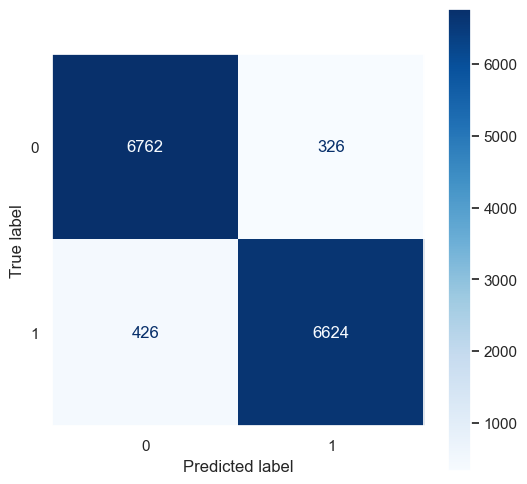

In [75]:
# Trim the shorter array
Y_test = Y_test[:len(pred_rf2)]

# Compute the confusion matrix
cm = confusion_matrix(Y_test, pred_rf2)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues)

# Remove the cell gridlines
plt.grid(which='major')

# Set the figure size
plt.gcf().set_size_inches(6, 6)

# Show the plot
plt.show()


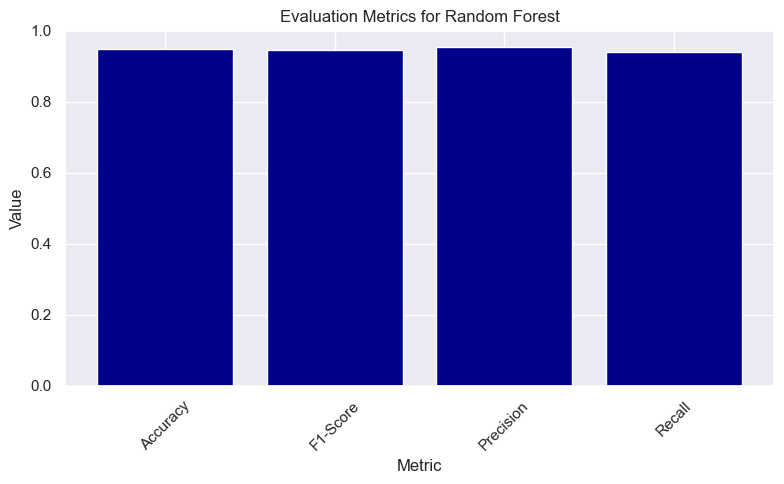

In [76]:
# Calculate and store the metrics
accuracy = accuracy_score(Y_test, pred_rf2 )
f1 = f1_score(Y_test, pred_rf2 )
precision = precision_score(Y_test, pred_rf2 )
recall = recall_score(Y_test, pred_rf2 )

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Metric'], metrics_df['Value'],color='darkblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AUC: 0.9467906200470678


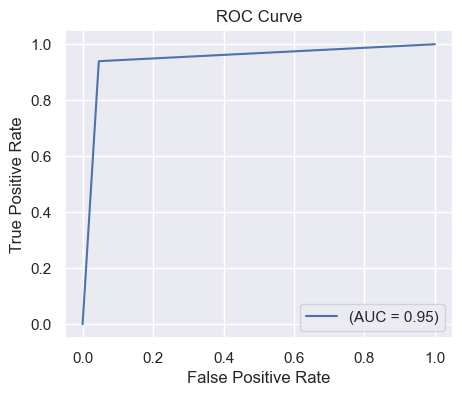


False Positive Rates: [0.         0.04599323 1.        ]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
True Positive Rates: [0.         0.93957447 1.        ]


In [77]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 4))
fpr, tpr, thresholds = roc_curve(Y_test, pred_rf2)

# Calculate the AUC
auc = roc_auc_score(Y_test, pred_rf2)

# Plot the ROC curve
plt.plot(fpr, tpr, label='(AUC = %0.2f)' % auc)

# Print the AUC
print('AUC:', auc)

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("")
print('False Positive Rates:', fpr)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print('True Positive Rates:', tpr)

# Naive Bayes:

In [78]:
GNB=GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB()

In [79]:
pred_GNB = GNB.predict(X_test)
pred_GNB

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [80]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_modelX3(Y_test):
    #fit the model instance 
    predictions = pred_GNB # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [81]:
print(classification_report(Y_test, pred_GNB))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      7088
           1       0.80      0.89      0.84      7050

    accuracy                           0.84     14138
   macro avg       0.84      0.84      0.83     14138
weighted avg       0.84      0.84      0.83     14138



In [82]:
# Calculate the accuracy score for the default Gaussian Naive Bayes model
accuracy_GNB = accuracy_score(Y_test, pred_GNB)
print("Accuracy score for default Gaussian Naive Bayes model:", accuracy_GNB)

Accuracy score for default Gaussian Naive Bayes model: 0.8350544631489603


In [83]:
R3 = train_evaluate_modelX3(Y_test)
R3.index = ['Gaussian Naive Bayes - Method 3']
R1= R1.append(R3)
R3.style.background_gradient(cmap = sns.color_palette("blend:darkblue,deepskyblue", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Gaussian Naive Bayes - Method 3,0.835054,0.842560,0.803917,0.885106,0.835189,0.835189


# Hyperparameter tuning for Naive Bayes

In [84]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

gridGNB = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 5)
  
# fitting the model for grid search
gridGNB.fit(X_train, Y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.839 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.847 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.838 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.848 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.845 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.840 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.848 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.839 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.848 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.846 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.841 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.65793322465756

[CV 1/5] END var_smoothing=0.012328467394420659;, score=0.834 total time=   0.0s
[CV 2/5] END var_smoothing=0.012328467394420659;, score=0.840 total time=   0.0s
[CV 3/5] END var_smoothing=0.012328467394420659;, score=0.837 total time=   0.0s
[CV 4/5] END var_smoothing=0.012328467394420659;, score=0.836 total time=   0.0s
[CV 5/5] END var_smoothing=0.012328467394420659;, score=0.839 total time=   0.0s
[CV 1/5] END ................var_smoothing=0.01;, score=0.834 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.01;, score=0.840 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.836 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.01;, score=0.836 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.01;, score=0.839 total time=   0.0s
[CV 1/5] END var_smoothing=0.008111308307896872;, score=0.834 total time=   0.0s
[CV 2/5] END var_smoothing=0.008111308307896872;, score=0.839 total time=   0.0s
[CV 3/5] END var_smoothing=0

[CV 4/5] END var_smoothing=0.0001873817422860383;, score=0.834 total time=   0.0s
[CV 5/5] END var_smoothing=0.0001873817422860383;, score=0.838 total time=   0.0s
[CV 1/5] END var_smoothing=0.0001519911082952933;, score=0.832 total time=   0.0s
[CV 2/5] END var_smoothing=0.0001519911082952933;, score=0.838 total time=   0.0s
[CV 3/5] END var_smoothing=0.0001519911082952933;, score=0.834 total time=   0.0s
[CV 4/5] END var_smoothing=0.0001519911082952933;, score=0.834 total time=   0.0s
[CV 5/5] END var_smoothing=0.0001519911082952933;, score=0.838 total time=   0.0s
[CV 1/5] END var_smoothing=0.0001232846739442066;, score=0.832 total time=   0.0s
[CV 2/5] END var_smoothing=0.0001232846739442066;, score=0.838 total time=   0.0s
[CV 3/5] END var_smoothing=0.0001232846739442066;, score=0.834 total time=   0.0s
[CV 4/5] END var_smoothing=0.0001232846739442066;, score=0.834 total time=   0.0s
[CV 5/5] END var_smoothing=0.0001232846739442066;, score=0.838 total time=   0.0s
[CV 1/5] END ...

[CV 1/5] END var_smoothing=1.873817422860383e-06;, score=0.832 total time=   0.0s
[CV 2/5] END var_smoothing=1.873817422860383e-06;, score=0.838 total time=   0.0s
[CV 3/5] END var_smoothing=1.873817422860383e-06;, score=0.834 total time=   0.0s
[CV 4/5] END var_smoothing=1.873817422860383e-06;, score=0.834 total time=   0.0s
[CV 5/5] END var_smoothing=1.873817422860383e-06;, score=0.838 total time=   0.0s
[CV 1/5] END var_smoothing=1.519911082952933e-06;, score=0.832 total time=   0.0s
[CV 2/5] END var_smoothing=1.519911082952933e-06;, score=0.838 total time=   0.0s
[CV 3/5] END var_smoothing=1.519911082952933e-06;, score=0.834 total time=   0.0s
[CV 4/5] END var_smoothing=1.519911082952933e-06;, score=0.834 total time=   0.0s
[CV 5/5] END var_smoothing=1.519911082952933e-06;, score=0.838 total time=   0.0s
[CV 1/5] END var_smoothing=1.232846739442066e-06;, score=0.832 total time=   0.0s
[CV 2/5] END var_smoothing=1.232846739442066e-06;, score=0.838 total time=   0.0s
[CV 3/5] END var

[CV 4/5] END var_smoothing=2.310129700083158e-08;, score=0.834 total time=   0.0s
[CV 5/5] END var_smoothing=2.310129700083158e-08;, score=0.838 total time=   0.0s
[CV 1/5] END var_smoothing=1.873817422860383e-08;, score=0.832 total time=   0.0s
[CV 2/5] END var_smoothing=1.873817422860383e-08;, score=0.838 total time=   0.0s
[CV 3/5] END var_smoothing=1.873817422860383e-08;, score=0.834 total time=   0.0s
[CV 4/5] END var_smoothing=1.873817422860383e-08;, score=0.834 total time=   0.0s
[CV 5/5] END var_smoothing=1.873817422860383e-08;, score=0.838 total time=   0.0s
[CV 1/5] END var_smoothing=1.519911082952933e-08;, score=0.832 total time=   0.0s
[CV 2/5] END var_smoothing=1.519911082952933e-08;, score=0.838 total time=   0.0s
[CV 3/5] END var_smoothing=1.519911082952933e-08;, score=0.834 total time=   0.0s
[CV 4/5] END var_smoothing=1.519911082952933e-08;, score=0.834 total time=   0.0s
[CV 5/5] END var_smoothing=1.519911082952933e-08;, score=0.838 total time=   0.0s
[CV 1/5] END var

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=5)

In [85]:
print(gridGNB.best_params_)

{'var_smoothing': 0.3511191734215131}


In [86]:
#Let's run our SVC again with the best parameters.
GNB2 = GaussianNB(var_smoothing = 0.2848035868435802)
GNB2.fit(X_train, Y_train)
pred_GNB2 = GNB2.predict(X_test)
print(classification_report(Y_test, pred_GNB2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7088
           1       0.84      0.86      0.85      7050

    accuracy                           0.85     14138
   macro avg       0.85      0.85      0.85     14138
weighted avg       0.85      0.85      0.85     14138



In [87]:
accuracy_GNB2 = accuracy_score(Y_test,pred_GNB2)
print("Accuracy score for nb model with best parameters:", accuracy_GNB2)

Accuracy score for nb model with best parameters: 0.8494836610553119


<Figure size 500x500 with 0 Axes>

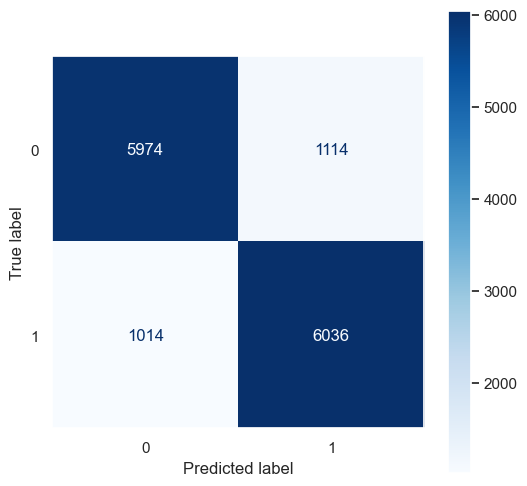

In [88]:
# Trim the shorter array
Y_test = Y_test[:len(pred_GNB2)]

# Compute the confusion matrix
cm = confusion_matrix(Y_test, pred_GNB2)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues)

# Remove the cell gridlines
plt.grid(which='major')

# Set the figure size
plt.gcf().set_size_inches(6, 6)

# Show the plot
plt.show()


In [89]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model3(Y_test):
    #fit the model instance 
    predictions = pred_GNB2 # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [90]:
resultsGNB = train_evaluate_model3(Y_test)
resultsGNB.index = ['Gaussian Naive Bayes - Method 3']
results= results.append(resultsGNB)
resultsGNB.style.background_gradient(cmap = sns.color_palette("blend:darkblue,deepskyblue", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Gaussian Naive Bayes - Method 3,0.849484,0.850141,0.844196,0.856170,0.849502,0.849502


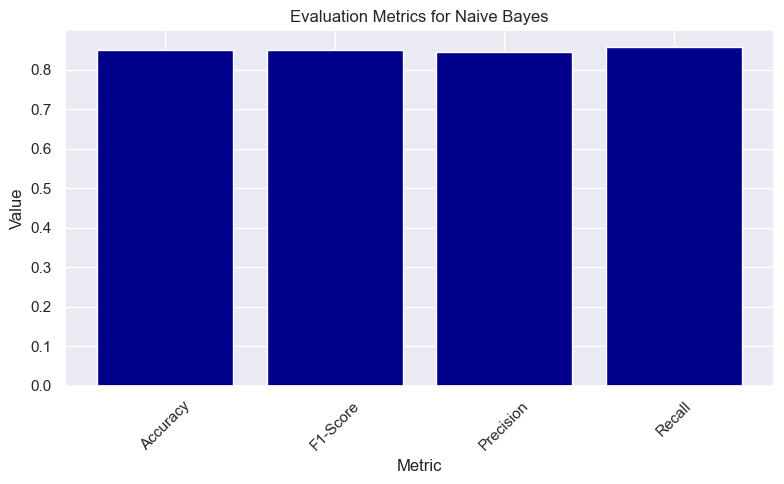

In [91]:
# Calculate and store the metrics
predictions = pred_GNB2
accuracy = accuracy_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Metric'], metrics_df['Value'],color='darkblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for Naive Bayes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AUC: 0.8495015849382834


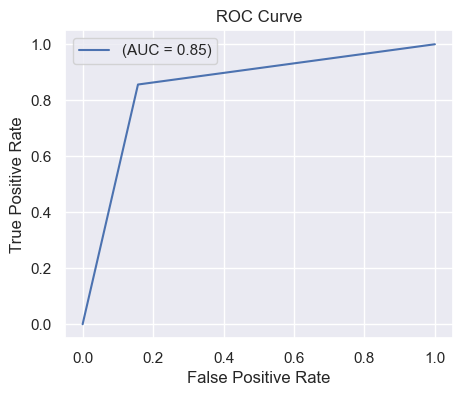


False Positive Rates: [0.         0.15716704 1.        ]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
True Positive Rates: [0.         0.85617021 1.        ]


In [92]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
predictions = pred_GNB2
fig, ax = plt.subplots(figsize=(5, 4))
fpr, tpr, thresholds = roc_curve(Y_test, predictions)

# Calculate the AUC
auc = roc_auc_score(Y_test, predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label='(AUC = %0.2f)' % auc)

# Print the AUC
print('AUC:', auc)

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("")
print('False Positive Rates:', fpr)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print('True Positive Rates:', tpr)

# SVM:


In [93]:
svc = svm.SVC()

In [94]:
svc.fit(X_train, Y_train)

SVC()

In [95]:
pred_svc = svc.predict(X_test)
pred_svc

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [96]:
print(classification_report(Y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7088
           1       0.99      0.99      0.99      7050

    accuracy                           0.99     14138
   macro avg       0.99      0.99      0.99     14138
weighted avg       0.99      0.99      0.99     14138



In [97]:
# Calculate the accuracy score for the default SVC model
accuracy_svc = accuracy_score(Y_test, pred_svc)
print("Accuracy score for default SVC model:", accuracy_svc)

Accuracy score for default SVC model: 0.9886122506719479


In [98]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model4(Y_test):
    #fit the model instance 
    predictions = pred_svc # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [99]:
resultssvc = train_evaluate_model4(Y_test)
resultssvc.index = ['Support Vector Machine - Method 4']
results= results.append(resultssvc)
resultssvc.style.background_gradient(cmap = sns.color_palette("blend:darkblue,deepskyblue", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Support Vector Machine - Method 4,0.988612,0.988597,0.987268,0.989929,0.988616,0.988616


<Figure size 500x500 with 0 Axes>

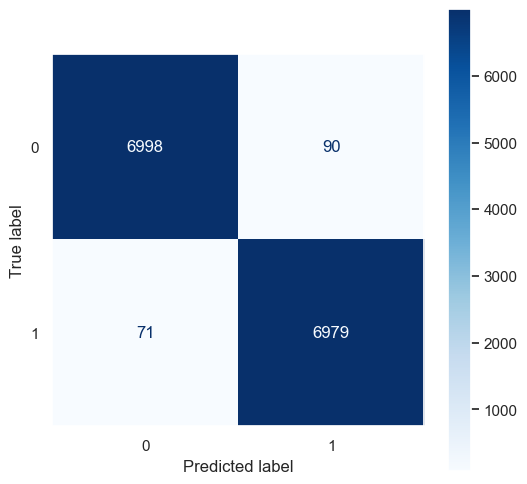

In [100]:
# Trim the shorter array
Y_test = Y_test[:len(pred_svc)]

# Compute the confusion matrix
cm = confusion_matrix(Y_test, pred_svc)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues)

# Remove the cell gridlines
plt.grid(which='major')

# Set the figure size
plt.gcf().set_size_inches(6, 6)

# Show the plot
plt.show()


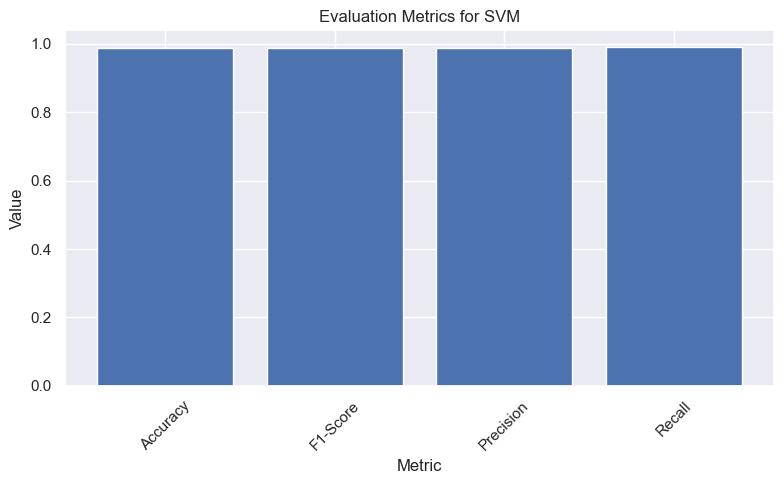

In [101]:
# Calculate and store the metrics
predictions=pred_svc
accuracy = accuracy_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Metric'], metrics_df['Value'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for SVM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AUC: 0.9886157805420811


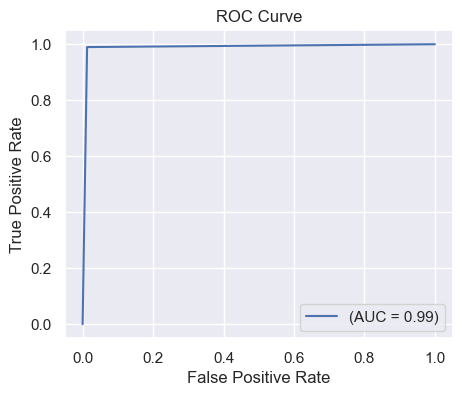


False Positive Rates: [0.         0.01269752 1.        ]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
True Positive Rates: [0.         0.98992908 1.        ]


In [102]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
predictions = pred_svc
fig, ax = plt.subplots(figsize=(5, 4))
fpr, tpr, thresholds = roc_curve(Y_test, predictions)

# Calculate the AUC
auc = roc_auc_score(Y_test, predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label='(AUC = %0.2f)' % auc)

# Print the AUC
print('AUC:', auc)

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("")
print('False Positive Rates:', fpr)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print('True Positive Rates:', tpr)

# Tuning for svm

In [103]:
# defining parameter range
param_grid = [
    {'C': [1, 10,], 'kernel': ['linear']},
    {'gamma': [0.001, 0.0001]},
]

 
gridsvc = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridsvc.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.870 total time=  46.1s
[CV 2/5] END ................C=1, kernel=linear;, score=0.872 total time=  48.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.869 total time=  47.7s
[CV 4/5] END ................C=1, kernel=linear;, score=0.875 total time=  48.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.874 total time=  47.7s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.870 total time= 2.0min
[CV 2/5] END ...............C=10, kernel=linear;, score=0.872 total time= 2.1min
[CV 3/5] END ...............C=10, kernel=linear;, score=0.869 total time= 2.1min
[CV 4/5] END ...............C=10, kernel=linear;, score=0.875 total time= 2.1min
[CV 5/5] END ...............C=10, kernel=linear;, score=0.874 total time= 2.1min
[CV 1/5] END .......................gamma=0.001;, score=0.870 total time= 1.2min
[CV 2/5] END .......................gamma=0.001;,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10], 'kernel': ['linear']},
                         {'gamma': [0.001, 0.0001]}],
             verbose=3)

In [104]:
print(gridsvc.best_params_)

{'gamma': 0.001}


In [105]:
# Let's run our SVC again with the best parameters.
svc2 = svm.SVC( gamma= 0.001)
svc2.fit(X_train, Y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(Y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7088
           1       0.88      0.86      0.87      7050

    accuracy                           0.87     14138
   macro avg       0.87      0.87      0.87     14138
weighted avg       0.87      0.87      0.87     14138



In [106]:
# Calculate the accuracy score for the default SVC model
accuracy_svc2 = accuracy_score(Y_test, pred_svc2)
print("Accuracy score for default SVC model:", accuracy_svc2)

Accuracy score for default SVC model: 0.8715518460885556


In [107]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    svc2 = KNeighborsClassifier(n_neighbors = 19, weights= 'distance')
    svc2.fit(X_train, Y_train)   
    predictions = svc2.predict(X_test)
    print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6922
           1       0.96      0.95      0.95      7217

    accuracy                           0.95     14139
   macro avg       0.95      0.95      0.95     14139
weighted avg       0.95      0.95      0.95     14139

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6942
           1       0.96      0.94      0.95      7197

    accuracy                           0.95     14139
   macro avg       0.95      0.95      0.95     14139
weighted avg       0.95      0.95      0.95     14139

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6992
           1       0.96      0.94      0.95      7146

    accuracy                           0.95     14138
   macro avg       0.95      0.95      0.95     14138
weighted avg       0.95      0.95      0.95     14138

              preci

In [108]:
accuracy_svc3 = accuracy_score(Y_test, predictions)
print("Accuracy score for Logistic regresssion model with best parameters:", accuracy_svc3)

Accuracy score for Logistic regresssion model with best parameters: 0.9513368227472061


# Logistic Regression:

In [236]:
log= LogisticRegression()

In [237]:
log.fit(X_train,Y_train)

LogisticRegression()

In [238]:
pred_log = log.predict(X_test)
pred_log

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [239]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_modelX5(Y_test):
    #fit the model instance 
    predictions = pred_log # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [240]:
print(classification_report(Y_test, pred_log))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     14137
           1       0.85      0.85      0.85     14140

    accuracy                           0.85     28277
   macro avg       0.85      0.85      0.85     28277
weighted avg       0.85      0.85      0.85     28277



In [241]:
# Calculate the accuracy score for the default Logistic regresssion model
accuracy_log = accuracy_score(Y_test, pred_log)
print("Accuracy score for default Logistic regresssion model:", accuracy_log)

Accuracy score for default Logistic regresssion model: 0.8518937652509107


In [242]:
R5 = train_evaluate_modelX5(Y_test)
R5.index = ['Gaussian Naive Bayes - Method 3']
R1= R1.append(R5)
R5.style.background_gradient(cmap = sns.color_palette("blend:darkblue,deepskyblue", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Gaussian Naive Bayes - Method 3,0.851894,0.851647,0.853158,0.850141,0.851894,0.851894


# Turning for Logistic regresssion using GridSearch:

In [243]:
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
               'solver': ['lbfgs', 'sag', 'newton-cg']}

 
gridlog = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridlog.fit(X_train, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.855 total time=   0.0s
[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.854 total time=   0.0s
[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.856 total time=   0.0s
[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.860 total time=   0.0s
[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.862 total time=   0.0s
[CV 1/5] END ................C=0.01, solver=sag;, score=0.855 total time=   0.0s
[CV 2/5] END ................C=0.01, solver=sag;, score=0.854 total time=   0.0s
[CV 3/5] END ................C=0.01, solver=sag;, score=0.856 total time=   0.0s
[CV 4/5] END ................C=0.01, solver=sag;, score=0.860 total time=   0.0s
[CV 5/5] END ................C=0.01, solver=sag;, score=0.862 total time=   0.0s
[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.855 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=newton-cg;

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'sag', 'newton-cg']},
             verbose=3)

In [244]:
print(gridlog.best_params_)

{'C': 1, 'solver': 'newton-cg'}


In [245]:
# Let's run our SVC again with the best parameters.
log2 = LogisticRegression(C= 10,
    solver= 'lbfgs',)
log2.fit(X_train, Y_train)
pred_log2 = log2.predict(X_test)
print(classification_report(Y_test, pred_log2))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     14137
           1       0.85      0.85      0.85     14140

    accuracy                           0.85     28277
   macro avg       0.85      0.85      0.85     28277
weighted avg       0.85      0.85      0.85     28277



# Cross-validation using scikit

In [262]:
kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    log2 = LogisticRegression(C= 1,
    solver= 'lbfgs',)
    log2.fit(X_train, Y_train)  
    predictions = knn2.predict(X_test)
    print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7146
           1       0.99      0.99      0.99      6993

    accuracy                           0.99     14139
   macro avg       0.99      0.99      0.99     14139
weighted avg       0.99      0.99      0.99     14139

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6940
           1       0.99      0.99      0.99      7199

    accuracy                           0.99     14139
   macro avg       0.99      0.99      0.99     14139
weighted avg       0.99      0.99      0.99     14139

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6998
           1       0.99      0.99      0.99      7140

    accuracy                           0.99     14138
   macro avg       0.99      0.99      0.99     14138
weighted avg       0.99      0.99      0.99     14138

              preci

In [263]:
accuracy_log3 = accuracy_score(Y_test, predictions)
print("Accuracy score for Logistic regresssion model with best parameters:", accuracy_log3)

Accuracy score for Logistic regresssion model with best parameters: 0.9917244306125336


In [248]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model5(Y_test):
    #fit the model instance 
    #predictions = pred_log # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [249]:
resultslog = train_evaluate_model5(Y_test)
resultslog.index = ['Logistic regresssion - Method 5']
results= results.append(resultslog)
resultslog.style.background_gradient(cmap = sns.color_palette("blend:darkblue,deepskyblue", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Logistic regresssion - Method 5,0.990098,0.990192,0.988668,0.991720,0.990084,0.990084


<Figure size 500x500 with 0 Axes>

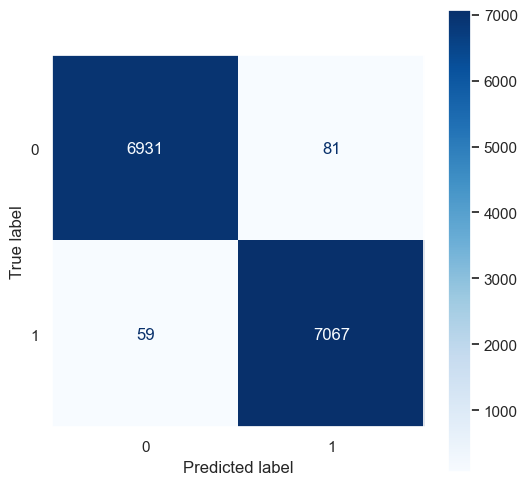

In [250]:
# Trim the shorter array
Y_test = Y_test[:len(predictions)]

# Compute the confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues)

# Remove the cell gridlines
plt.grid(which='major')

# Set the figure size
plt.gcf().set_size_inches(6, 6)

# Show the plot
plt.show()


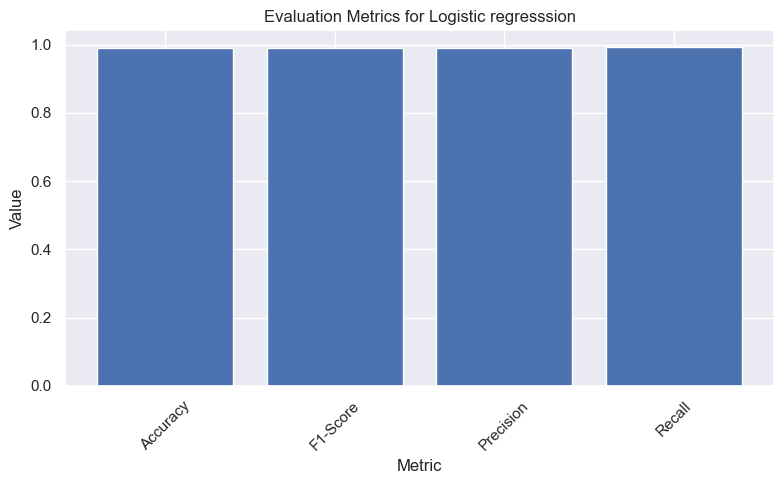

In [251]:
# Calculate and store the metrics
accuracy = accuracy_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Metric'], metrics_df['Value'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for Logistic regresssion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AUC: 0.9900844172509531


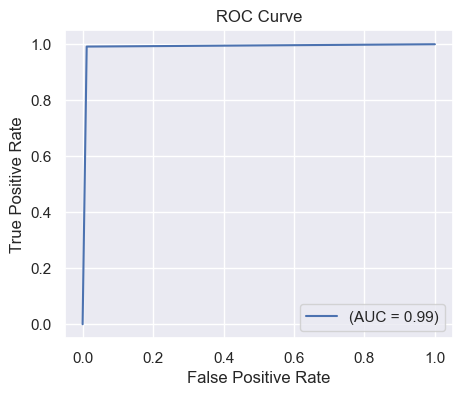


False Positive Rates: [0.         0.01155163 1.        ]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
True Positive Rates: [0.         0.99172046 1.        ]


In [252]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 4))
fpr, tpr, thresholds = roc_curve(Y_test, predictions)

# Calculate the AUC
auc = roc_auc_score(Y_test, predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label='(AUC = %0.2f)' % auc)

# Print the AUC
print('AUC:', auc)

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("")
print('False Positive Rates:', fpr)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print('True Positive Rates:', tpr)

# Predictive system

In [323]:
X =diabetes_data.drop(columns='Diabetes',axis=1)
Y = diabetes_data['Diabetes']

In [324]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.4)

In [350]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# assuming you have your X and Y DataFrames here

# define the number of folds for k-fold cross-validation
n_folds = 5

# initialize the KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# iterate over each fold in the k-fold cross-validation
for train_index, test_index in kf.split(X):
    # use numpy.r_ to convert the index arrays into arrays of column indices
    X_train, X_test = X.iloc[np.r_[train_index]], X.iloc[np.r_[test_index]]
    Y_train, Y_test = Y.iloc[np.r_[train_index]], Y.iloc[np.r_[test_index]]
    
    # create an instance of the LogisticRegression model
    log2 = LogisticRegression(C= 1, penalty='l1', solver='liblinear')
    
    # train the model on the training data
    log2.fit(X_train, Y_train)
    
    # test the model on the test data
    Y_pred = log2.predict(X_test)
    
    # print the classification report and accuracy score for this fold
    print("\nClassification report for logistic regression model in this fold:")
    print(classification_report(Y_test, Y_pred))
    
    accuracy_log2 = accuracy_score(Y_test, Y_pred)
    print("Accuracy score for logistic regression model in this fold:", accuracy_log2)


Classification report for logistic regression model in this fold:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy score for logistic regression model in this fold: 0.7470118113020723

Classification report for logistic regression model in this fold:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      7023
           1       0.74      0.77      0.75      7116

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

Accuracy score for logistic regression model in this fold: 0.7438291251149304

Classification report for logistic regression model in 

In [328]:
X_train_a.shape

(42415, 13)

# Accuracy Score

In [334]:
  # accuracy score on the training data
X_train_prediction = log2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)  

In [335]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7462425292640662


In [336]:
# accuracy score on the test data

test_data_accuracy = accuracy_score(predictions, Y_test)

In [337]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9799122931107653


# Making a Predictive System

In [348]:
input_data = (6,1,1,37,0,0,0,1,4,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predictions = log2.predict(input_data_reshaped)
print(predictions)

if (predictions[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# Model Comparison after tuning:

In [126]:
results.style.background_gradient(cmap = sns.color_palette("blend:darkblue,deepskyblue", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.950134,0.950243,0.945638,0.954894,0.950147,0.950147
Random Forest - Method 2,0.951549,0.951635,0.947420,0.955887,0.951561,0.951561
Gaussian Naive Bayes - Method 3,0.849484,0.850141,0.844196,0.856170,0.849502,0.849502
Support Vector Machine - Method 4,0.988612,0.988597,0.987268,0.989929,0.988616,0.988616
Logistic regresssion - Method 5,0.989956,0.989976,0.989278,0.990675,0.989955,0.989955


# ML Comparison graph

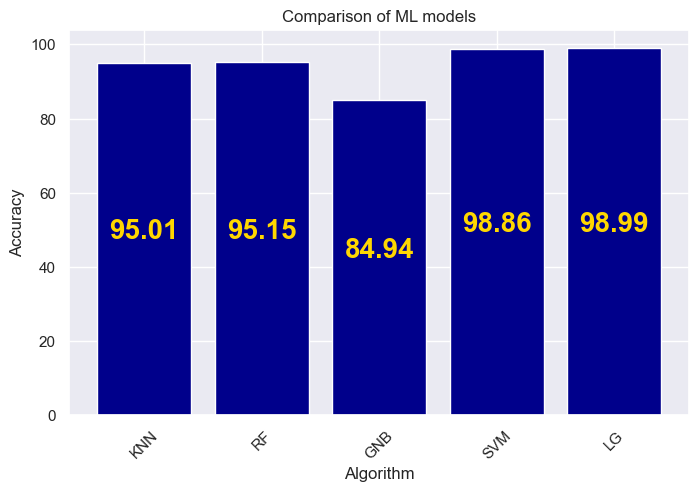

In [184]:
fig = plt.figure(figsize=(8, 5)) 

labels = ["KNN", "RF","GNB","SVM","LG"]
accuracy_values = [95.01,95.15,84.94,98.86,98.99]

plt.bar(labels,accuracy_values,color='darkblue')

for i,v in enumerate(accuracy_values):
    plt.text(i, v/2, str(v), ha='center', color='gold', fontsize=20,fontweight='bold')

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Comparison of ML models")
plt.xticks(rotation=45)
plt.show()

# Deep learning techniques:

# Convolutional Neural Networks (CNNs):

In [131]:
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [132]:
diabetes_data_2=pd.read_csv("Diabetes_dataset.csv") #loading the dataset

In [133]:
#Data splitting
X =diabetes_data_2.drop(columns='Diabetes',axis=1)
Y = diabetes_data_2['Diabetes']

In [134]:
# Reshape the data into a 3D tensor for CNN input
X = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [135]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [136]:
# Normalize the features
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [137]:
# Define the CNN model
model = keras.Sequential()
#model.add(BatchNormalization())
#model.add(BatchNormalization())
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [138]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [139]:
# Train the model
model.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
1547/1547 [==============================] - 6s 3ms/step - loss: 0.5868 - accuracy: 0.6904
Epoch 2/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.5355 - accuracy: 0.7306
Epoch 3/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.5286 - accuracy: 0.7355
Epoch 4/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.5268 - accuracy: 0.7354
Epoch 5/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.5251 - accuracy: 0.7372
Epoch 6/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.5234 - accuracy: 0.7379
Epoch 7/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.5226 - accuracy: 0.7374
Epoch 8/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.5206 - accuracy: 0.7400
Epoch 9/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.5202 - accuracy: 0.7397
Epoch 10/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.520

In [140]:
# evaluate the model
_, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.48


# Recurrent Neural Networks (RNNs) Using LSTM Method

In [141]:
#Data splitting
X =diabetes_data_2.drop(columns='Diabetes',axis=1)
Y = diabetes_data_2['Diabetes']

In [142]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [143]:
# Define the RNN model
model = keras.Sequential()
#model.add(keras.layers.Embedding(input_dim=1000, output_dim=64))
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=32))
model.add(keras.layers.Dense(128, activation='relu'),)
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [144]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [145]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1547/1547 [==============================] - 34s 19ms/step - loss: 0.5642 - accuracy: 0.7077
Epoch 2/10
1547/1547 [==============================] - 30s 20ms/step - loss: 0.5274 - accuracy: 0.7384
Epoch 3/10
1547/1547 [==============================] - 31s 20ms/step - loss: 0.5188 - accuracy: 0.7440
Epoch 4/10
1547/1547 [==============================] - 30s 20ms/step - loss: 0.5149 - accuracy: 0.7444
Epoch 5/10
1547/1547 [==============================] - 30s 20ms/step - loss: 0.5143 - accuracy: 0.7470
Epoch 6/10
1547/1547 [==============================] - 30s 20ms/step - loss: 0.5124 - accuracy: 0.7478
Epoch 7/10
1547/1547 [==============================] - 30s 20ms/step - loss: 0.5116 - accuracy: 0.7479
Epoch 8/10
1547/1547 [==============================] - 30s 20ms/step - loss: 0.5097 - accuracy: 0.7486
Epoch 9/10
1547/1547 [==============================] - 30s 20ms/step - loss: 0.5099 - accuracy: 0.7480
Epoch 10/10
1547/1547 [==============================] - 32s 21m

In [146]:
# evaluate the model
_, accuracy2 = model.evaluate(X_train, Y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.48


# Multilayer perceptron(MLP)

In [147]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


diabetes_data_2=pd.read_csv("Diabetes_dataset.csv")

X =diabetes_data_2.drop(columns='Diabetes',axis=1)
Y = diabetes_data_2['Diabetes']

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


scaler= StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
# Define the MLP model
model = Sequential()
model.add(Dense(18, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_std, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Epoch 1/30
1768/1768 [==============================] - 6s 3ms/step - loss: 0.1945 - accuracy: 0.7209 - val_loss: 0.1737 - val_accuracy: 0.7447
Epoch 2/30
1768/1768 [==============================] - 5s 3ms/step - loss: 0.1716 - accuracy: 0.7475 - val_loss: 0.1706 - val_accuracy: 0.7474
Epoch 3/30
1768/1768 [==============================] - 5s 3ms/step - loss: 0.1698 - accuracy: 0.7488 - val_loss: 0.1696 - val_accuracy: 0.7503
Epoch 4/30
1768/1768 [==============================] - 5s 3ms/step - loss: 0.1691 - accuracy: 0.7514 - val_loss: 0.1697 - val_accuracy: 0.7524
Epoch 5/30
1768/1768 [==============================] - 5s 3ms/step - loss: 0.1684 - accuracy: 0.7519 - val_loss: 0.1698 - val_accuracy: 0.7505
Epoch 6/30
1768/1768 [==============================] - 6s 3ms/step - loss: 0.1681 - accuracy: 0.7521 - val_loss: 0.1684 - val_accuracy: 0.7517
Epoch 7/30
1768/1768 [==============================] - 5s 3ms/step - loss: 0.1678 - accuracy: 0.7527 - val_loss: 0.1681 - val_accuracy:

In [148]:
# evaluate the model
_, accuracy2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.48


442/442 [==============================] - 1s 2ms/step
AUC: 0.828586695469013


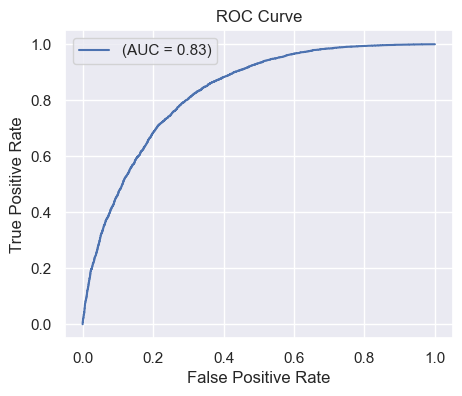


False Positive Rates: [0.         0.         0.         ... 0.99337094 0.99365303 1.        ]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
True Positive Rates: [0.00000000e+00 1.41864094e-04 8.51184565e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


In [149]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 4))
y_proba = model.predict(X_test)[:, 0]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='(AUC = %0.2f)' % auc)

# Print the AUC
print('AUC:', auc)

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("")
print('False Positive Rates:', fpr)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print('True Positive Rates:', tpr)

# Bayesian Optimized Long-Short Term Memory Recurrent Neural Network

In [161]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [162]:
diabetes_data_2=pd.read_csv("Diabetes_dataset.csv") #loading the dataset

In [163]:
#Data splitting
X =diabetes_data_2.drop(columns='Diabetes',axis=1)
Y = diabetes_data_2['Diabetes']

In [164]:
S= StandardScaler() 
S.fit(X)



StandardScaler()

In [165]:
Stdz_data=S.transform(X)


In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(Stdz_data)
x_pca=pca.transform(Stdz_data)

In [167]:
X= x_pca
y= diabetes_data['Diabetes'] 

In [168]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [169]:
print(X.shape, X_train.shape, X_test.shape)

(70692, 10) (56553, 10) (14139, 10)


In [170]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [171]:
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
1768/1768 [==============================] - 44s 22ms/step - loss: 0.2012 - accuracy: 0.6921
Epoch 2/30
1768/1768 [==============================] - 39s 22ms/step - loss: 0.1858 - accuracy: 0.7214
Epoch 3/30
1768/1768 [==============================] - 38s 22ms/step - loss: 0.1824 - accuracy: 0.7286
Epoch 4/30
1768/1768 [==============================] - 38s 22ms/step - loss: 0.1793 - accuracy: 0.7327
Epoch 5/30
1768/1768 [==============================] - 38s 22ms/step - loss: 0.1766 - accuracy: 0.7379
Epoch 6/30
1768/1768 [==============================] - 38s 22ms/step - loss: 0.1759 - accuracy: 0.7391
Epoch 7/30
1768/1768 [==============================] - 38s 22ms/step - loss: 0.1749 - accuracy: 0.7409
Epoch 8/30
1768/1768 [==============================] - 39s 22ms/step - loss: 0.1749 - accuracy: 0.7428
Epoch 9/30
1768/1768 [==============================] - 40s 22ms/step - loss: 0.1746 - accuracy: 0.7419
Epoch 10/30
1768/1768 [==============================] - 39s 22m

In [172]:
# evaluate the model
_, accuracy3 = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.25


In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the output for the testing data
predictions = model.predict(X_test)

# Calculate the mean absolute error and mean squared error
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

442/442 [==============================] - 5s 8ms/step
Mean Absolute Error: 0.33602722571015703
Mean Squared Error: 0.17182116700034547


442/442 [==============================] - 3s 8ms/step
AUC: 0.8218153877773668


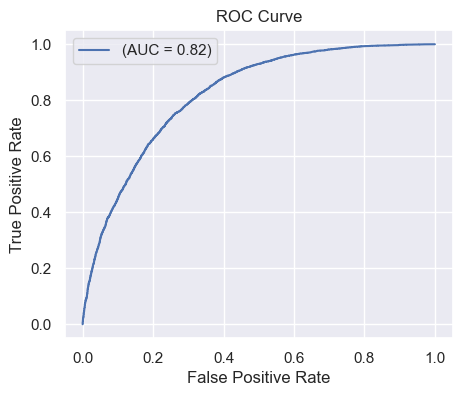


False Positive Rates: [0.         0.         0.         ... 0.99596076 0.9965378  1.        ]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
True Positive Rates: [0.00000000e+00 1.38753989e-04 1.66504787e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


In [174]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 4))
y_proba = model.predict(X_test)[:, 0]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='(AUC = %0.2f)' % auc)

# Print the AUC
print('AUC:', auc)

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("")
print('False Positive Rates:', fpr)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print('True Positive Rates:', tpr)

# Model Comparison 

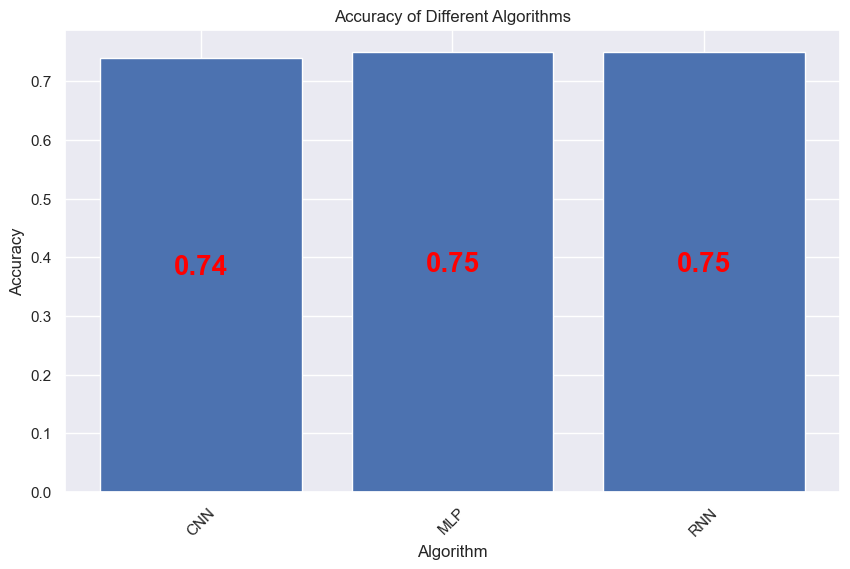

In [181]:
fig = plt.figure(figsize=(10,6)) 

labels = ["CNN", "MLP","RNN"]
accuracy_values = [accuracy, accuracy2, accuracy3]
r_accuracy_values = [round(v, 2) for v in accuracy_values]
plt.bar(labels,r_accuracy_values)

for i,v in enumerate(r_accuracy_values):
    plt.text(i, v/2, str(v), ha='center', color='red', fontsize=20,fontweight='bold')

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Algorithms")
plt.xticks(rotation=45)
plt.show()

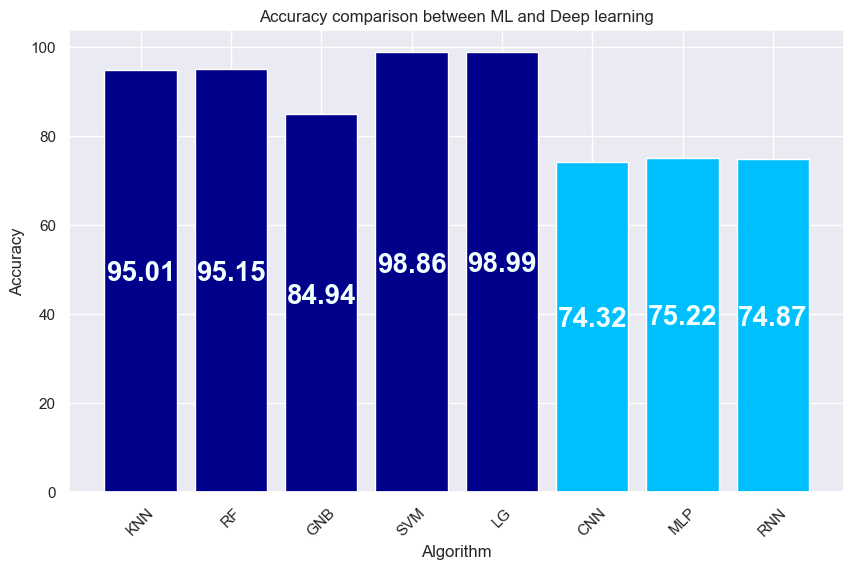

In [187]:

fig = plt.figure(figsize=(10,6))


labels = ["KNN", "RF","GNB","SVM","LG","CNN", "MLP","RNN"]
accuracy_values = [95.01,95.15,84.94,98.86,98.99,accuracy*100, accuracy2*100, accuracy3*100]
r_accuracy_values = [round(v, 2) for v in accuracy_values]

# Define a list of colors for each bar
colors = ['darkblue'] * len(labels)
colors[-3:] = ['deepskyblue','deepskyblue','deepskyblue'] # Change the last 3 colors to red, green, and blue

# Plot the bars with the specified colors
plt.bar(labels, r_accuracy_values, color=colors)

# Annotate the bars with their accuracy values
for i, v in enumerate(r_accuracy_values):
    plt.text(i, v/2, str(v), ha='center', color='azure', fontsize=20, fontweight='bold')

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy comparison between ML and Deep learning")
plt.xticks(rotation=45)
plt.show()